# Title -  Customer Segmentation and Recommendation system

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv('data.csv',encoding='latin1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [5]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

### 1.Dropping the rows which have null values.

In [6]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(406829, 8)

### 2. Dropping the duplicate rows

In [9]:
#checking for duplicate values
df[df.duplicated(keep=False)]

InvoiceNo StockCode                       Description  Quantity  \
485       536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489       536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
494       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
521       536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
...          ...       ...                               ...       ...   
541675    581538     22068       BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318    BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992            REVOLVER WOODEN RULER          1   
541699    581538     22694                      WICKER STAR          1   
541701    581538     23343      JUMBO BAG VINTAGE CHRISTMAS          1   

            InvoiceDate  UnitPrice  CustomerID         Country  
485     12/1/2010 11:45       4.95     17908.0  United Kingdom  
489     12/1/2010 11:45       2.10     17908.0  United Kingdom  
494     12/1/2010 11:45       1.25     17908.0  United Kingdom  
517     12/1/2010 11:45       1.25     17908.0  United Kingdom  
521     12/1/2010 11:45       2.95     17908.0  United Kingdom  
...                 ...        ...         ...             ...  
541675  12/9/2011 11:34       0.39     14446.0  United Kingdom  
541689  12/9/2011 11:34       2.49     14446.0  United Kingdom  
541692  12/9/2011 11:34       1.95     14446.0  United Kingdom  
541699  12/9/2011 11:34       2.10     14446.0  United Kingdom  
541701  12/9/2011 11:34       2.08     14446.0  United Kingdom  

[10062 rows x 8 columns]

In [10]:
df.shape

(406829, 8)

In [11]:
df.drop_duplicates(inplace=True)

### 3 .Filtering columns with unit price equal to zero


In [12]:
#filtering out unit price where it's greater than 0
df =df[df['UnitPrice']>0]

### 4. Identifying cancelled orders 

In [13]:
df[df['InvoiceNo'].str.startswith('C')]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

            InvoiceDate  UnitPrice  CustomerID         Country  
141      12/1/2010 9:41      27.50     14527.0  United Kingdom  
154      12/1/2010 9:49       4.65     15311.0  United Kingdom  
235     12/1/2010 10:24       1.65     17548.0  United Kingdom  
236     12/1/2010 10:24       0.29     17548.0  United Kingdom  
237     12/1/2010 10:24       0.29     17548.0  United Kingdom  
...                 ...        ...         ...             ...  
540449   12/9/2011 9:57       0.83     14397.0  United Kingdom  
541541  12/9/2011 10:28     224.69     15498.0  United Kingdom  
541715  12/9/2011 11:57      10.95     15311.0  United Kingdom  
541716  12/9/2011 11:58       1.25     17315.0  United Kingdom  
541717  12/9/2011 11:58       1.25     17315.0  United Kingdom  

[8872 rows x 8 columns]

Creating new column 'Order_status' and segrigating data as 'successfull' and 'cancelled' 

In [14]:
def find_cancelled_transaction(x):
    if x.startswith('C'):
        return 'cancelled'
    else:
        return 'Sucessfull'
    

In [15]:
#Creating a column order status
df['Order_status']=df.InvoiceNo.apply(find_cancelled_transaction)

In [16]:
df.sample(100)

InvoiceNo StockCode                       Description  Quantity  \
158776    550313     21578  WOODLAND DESIGN  COTTON TOTE BAG         6   
427548    573390     23349       ROLL WRAP VINTAGE CHRISTMAS        12   
49214     540508    85099F              JUMBO BAG STRAWBERRY         5   
114568    546027      POST                           POSTAGE         2   
223201    556474     20723          STRAWBERRY CHARLOTTE BAG         1   
...          ...       ...                               ...       ...   
444558    574734     23188    VINTAGE  2 METRE FOLDING RULER         1   
151039   C549532      POST                           POSTAGE        -1   
73599    C542366     22095              LADS ONLY TISSUE BOX        -8   
426564    573359     21984  PACK OF 12 PINK PAISLEY TISSUES          4   
94685     544406     22905         CALENDAR IN SEASON DESIGN         5   

             InvoiceDate  UnitPrice  CustomerID         Country Order_status  
158776   4/17/2011 11:21       2.25     12681.0          France   Sucessfull  
427548  10/30/2011 14:53       1.25     17213.0  United Kingdom   Sucessfull  
49214     1/9/2011 11:20       1.95     14810.0  United Kingdom   Sucessfull  
114568     3/9/2011 8:09      15.00     12759.0     Netherlands   Sucessfull  
223201   6/12/2011 12:01       0.85     16007.0  United Kingdom   Sucessfull  
...                  ...        ...         ...             ...          ...  
444558   11/6/2011 15:20       1.65     15025.0  United Kingdom   Sucessfull  
151039    4/8/2011 17:07       7.06     16217.0  United Kingdom    cancelled  
73599    1/27/2011 12:54       1.25     13777.0  United Kingdom    cancelled  
426564  10/30/2011 12:48       0.39     14178.0  United Kingdom   Sucessfull  
94685    2/18/2011 13:26       2.95     16726.0  United Kingdom   Sucessfull  

[100 rows x 9 columns]

there are some stock codes which are entirely textual, we are trying to segment the customers based on only the transcations where they purchase something. 


### 5.Addressing Stock code anomalies

In [17]:
Stock_code_list=df['StockCode']

In [18]:
type(Stock_code_list)

pandas.core.series.Series

In [19]:
b=[]
for i in Stock_code_list:
    if i.isalpha() and i not in b:
        b.append(i)
b
        

['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']

Dropping the rows with stockcode values as aplhabets

In [20]:
df=df[~df['StockCode'].isin(b)]

### 6. Finding Return Order Quantity 

In [21]:
temp_df = df[['Quantity']]

In [22]:
df[df['Order_status']=='cancelled']

InvoiceNo StockCode                        Description  Quantity  \
154      C536383    35004C    SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556     PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984   PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   
238      C536391     21980  PACK OF 12 RED RETROSPOT TISSUES        -24   
...          ...       ...                                ...       ...   
540448   C581490     22178    VICTORIAN GLASS HANGING T-LIGHT       -12   
540449   C581490     23144    ZINC T-LIGHT HOLDER STARS SMALL       -11   
541715   C581568     21258         VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978   HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979      36 PENCILS TUBE RED RETROSPOT        -5   

            InvoiceDate  UnitPrice  CustomerID         Country Order_status  
154      12/1/2010 9:49       4.65     15311.0  United Kingdom    cancelled  
235     12/1/2010 10:24       1.65     17548.0  United Kingdom    cancelled  
236     12/1/2010 10:24       0.29     17548.0  United Kingdom    cancelled  
237     12/1/2010 10:24       0.29     17548.0  United Kingdom    cancelled  
238     12/1/2010 10:24       0.29     17548.0  United Kingdom    cancelled  
...                 ...        ...         ...             ...          ...  
540448   12/9/2011 9:57       1.95     14397.0  United Kingdom    cancelled  
540449   12/9/2011 9:57       0.83     14397.0  United Kingdom    cancelled  
541715  12/9/2011 11:57      10.95     15311.0  United Kingdom    cancelled  
541716  12/9/2011 11:58       1.25     17315.0  United Kingdom    cancelled  
541717  12/9/2011 11:58       1.25     17315.0  United Kingdom    cancelled  

[8507 rows x 9 columns]

Created a new column Returned_order_qty and converted the negative quantities to positive

In [23]:
def returns(x):
    if x<0:
        return x*-1
    else:
        return 0
    

In [24]:
df['Returned_order_qty']= df.Quantity.apply(returns)

In [25]:
df[df['Order_status'] == 'cancelled']

InvoiceNo StockCode                        Description  Quantity  \
154      C536383    35004C    SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556     PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984   PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   
238      C536391     21980  PACK OF 12 RED RETROSPOT TISSUES        -24   
...          ...       ...                                ...       ...   
540448   C581490     22178    VICTORIAN GLASS HANGING T-LIGHT       -12   
540449   C581490     23144    ZINC T-LIGHT HOLDER STARS SMALL       -11   
541715   C581568     21258         VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978   HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979      36 PENCILS TUBE RED RETROSPOT        -5   

            InvoiceDate  UnitPrice  CustomerID         Country Order_status  \
154      12/1/2010 9:49       4.65     15311.0  United Kingdom    cancelled   
235     12/1/2010 10:24       1.65     17548.0  United Kingdom    cancelled   
236     12/1/2010 10:24       0.29     17548.0  United Kingdom    cancelled   
237     12/1/2010 10:24       0.29     17548.0  United Kingdom    cancelled   
238     12/1/2010 10:24       0.29     17548.0  United Kingdom    cancelled   
...                 ...        ...         ...             ...          ...   
540448   12/9/2011 9:57       1.95     14397.0  United Kingdom    cancelled   
540449   12/9/2011 9:57       0.83     14397.0  United Kingdom    cancelled   
541715  12/9/2011 11:57      10.95     15311.0  United Kingdom    cancelled   
541716  12/9/2011 11:58       1.25     17315.0  United Kingdom    cancelled   
541717  12/9/2011 11:58       1.25     17315.0  United Kingdom    cancelled   

        Returned_order_qty  
154                      1  
235                     12  
236                     24  
237                     24  
238                     24  
...                    ...  
540448                  12  
540449                  11  
541715                   5  
541716                   1  
541717                   5  

[8507 rows x 10 columns]

In [26]:
def dropneg(x):
    if x <0:
        return 0
    else :
        return x

In [27]:
df.Quantity=df.Quantity.apply(dropneg)

### 7. converting into standard Date time format and Extracting Month and year

In [28]:
df.InvoiceDate = pd.to_datetime(df['InvoiceDate'])

In [29]:
df['year'] = pd.to_datetime(df['InvoiceDate']).dt.year

In [30]:
df.year.nunique()

2

In [31]:
df['month'] = pd.to_datetime(df['InvoiceDate']).dt.month_name()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399802 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           399802 non-null  object        
 1   StockCode           399802 non-null  object        
 2   Description         399802 non-null  object        
 3   Quantity            399802 non-null  int64         
 4   InvoiceDate         399802 non-null  datetime64[ns]
 5   UnitPrice           399802 non-null  float64       
 6   CustomerID          399802 non-null  float64       
 7   Country             399802 non-null  object        
 8   Order_status        399802 non-null  object        
 9   Returned_order_qty  399802 non-null  int64         
 10  year                399802 non-null  int32         
 11  month               399802 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(6)
memory usage: 38.1+ MB


In [33]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country Order_status  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   Sucessfull   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   Sucessfull   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   Sucessfull   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   Sucessfull   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   Sucessfull   

   Returned_order_qty  year     month  
0                   0  2010  December  
1                   0  2010  December  
2                   0  2010  December  
3                   0  2010  December  
4                   0  2010  December

### 8. Days since last purchase column computation

In [34]:
max_date=df.InvoiceDate.max()

In [35]:
max_date

Timestamp('2011-12-09 12:50:00')

In [36]:
customer_data = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()

In [37]:
customer_data['Days_since_Most_rececnt_purchase']= (max_date- customer_data['InvoiceDate']).dt.days

In [38]:
customer_data

CustomerID         InvoiceDate  Days_since_Most_rececnt_purchase
0        12346.0 2011-01-18 10:17:00                               325
1        12347.0 2011-12-07 15:52:00                                 1
2        12348.0 2011-09-25 13:13:00                                74
3        12349.0 2011-11-21 09:51:00                                18
4        12350.0 2011-02-02 16:01:00                               309
...          ...                 ...                               ...
4357     18280.0 2011-03-07 09:52:00                               277
4358     18281.0 2011-06-12 10:53:00                               180
4359     18282.0 2011-12-02 11:43:00                                 7
4360     18283.0 2011-12-06 12:02:00                                 3
4361     18287.0 2011-10-28 09:29:00                                42

[4362 rows x 3 columns]

### 9.Total Transactions column addition.

In [39]:
customer_data['Total_transactions'] = df.groupby('CustomerID')['InvoiceNo'].count().reset_index(drop=True)


In [40]:
df.groupby('CustomerID')['InvoiceNo'].count().reset_index(drop=True)

0         2
1       182
2        27
3        72
4        16
       ... 
4357     10
4358      7
4359     13
4360    719
4361     70
Name: InvoiceNo, Length: 4362, dtype: int64

In [41]:
customer_data

CustomerID         InvoiceDate  Days_since_Most_rececnt_purchase  \
0        12346.0 2011-01-18 10:17:00                               325   
1        12347.0 2011-12-07 15:52:00                                 1   
2        12348.0 2011-09-25 13:13:00                                74   
3        12349.0 2011-11-21 09:51:00                                18   
4        12350.0 2011-02-02 16:01:00                               309   
...          ...                 ...                               ...   
4357     18280.0 2011-03-07 09:52:00                               277   
4358     18281.0 2011-06-12 10:53:00                               180   
4359     18282.0 2011-12-02 11:43:00                                 7   
4360     18283.0 2011-12-06 12:02:00                                 3   
4361     18287.0 2011-10-28 09:29:00                                42   

      Total_transactions  
0                      2  
1                    182  
2                     27  
3                     72  
4                     16  
...                  ...  
4357                  10  
4358                   7  
4359                  13  
4360                 719  
4361                  70  

[4362 rows x 4 columns]

### 10. Total products purchased by each customer column

In [42]:
customer_data['total_products_purchased'] = df.groupby('CustomerID')['Quantity'].sum().reset_index(drop=True)

In [43]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country Order_status  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   Sucessfull   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   Sucessfull   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   Sucessfull   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   Sucessfull   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   Sucessfull   

   Returned_order_qty  year     month  
0                   0  2010  December  
1                   0  2010  December  
2                   0  2010  December  
3                   0  2010  December  
4                   0  2010  December

In [44]:
customer_data.sample(10)

CustomerID         InvoiceDate  Days_since_Most_rececnt_purchase  \
1413     14251.0 2011-12-08 08:32:00                                 1   
1704     14653.0 2011-12-08 13:45:00                                 0   
2078     15164.0 2011-10-02 12:05:00                                68   
4152     17999.0 2011-11-02 15:56:00                                36   
2672     15974.0 2011-10-31 13:13:00                                38   
2639     15920.0 2011-07-08 15:25:00                               153   
4265     18159.0 2011-02-11 14:26:00                               300   
4138     17977.0 2011-11-10 13:28:00                                28   
184      12578.0 2011-11-18 13:30:00                                20   
44       12402.0 2011-01-20 13:49:00                               322   

      Total_transactions  total_products_purchased  
1413                  78                      1674  
1704                 233                       944  
2078                 101                       351  
4152                  91                       219  
2672                 177                      2262  
2639                  58                        94  
4265                  23                       139  
4138                  21                       342  
184                  118                      1182  
44                    10                        92

### 11. Calculating Total spend column 

In [45]:
customer_data['Total_spend'] = df.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum()).reset_index(drop=True)


In [46]:
customer_data

CustomerID         InvoiceDate  Days_since_Most_rececnt_purchase  \
0        12346.0 2011-01-18 10:17:00                               325   
1        12347.0 2011-12-07 15:52:00                                 1   
2        12348.0 2011-09-25 13:13:00                                74   
3        12349.0 2011-11-21 09:51:00                                18   
4        12350.0 2011-02-02 16:01:00                               309   
...          ...                 ...                               ...   
4357     18280.0 2011-03-07 09:52:00                               277   
4358     18281.0 2011-06-12 10:53:00                               180   
4359     18282.0 2011-12-02 11:43:00                                 7   
4360     18283.0 2011-12-06 12:02:00                                 3   
4361     18287.0 2011-10-28 09:29:00                                42   

      Total_transactions  total_products_purchased  Total_spend  
0                      2                     74215     77183.60  
1                    182                      2458      4310.00  
2                     27                      2332      1437.24  
3                     72                       630      1457.55  
4                     16                       196       294.40  
...                  ...                       ...          ...  
4357                  10                        45       180.60  
4358                   7                        54        80.82  
4359                  13                       103       178.05  
4360                 719                      1355      2039.58  
4361                  70                      1586      1837.28  

[4362 rows x 6 columns]

### 12. Average spend column

In [47]:
customer_data['Average_spend']=customer_data['Total_spend']/customer_data['Total_transactions']

In [48]:
customer_data

CustomerID         InvoiceDate  Days_since_Most_rececnt_purchase  \
0        12346.0 2011-01-18 10:17:00                               325   
1        12347.0 2011-12-07 15:52:00                                 1   
2        12348.0 2011-09-25 13:13:00                                74   
3        12349.0 2011-11-21 09:51:00                                18   
4        12350.0 2011-02-02 16:01:00                               309   
...          ...                 ...                               ...   
4357     18280.0 2011-03-07 09:52:00                               277   
4358     18281.0 2011-06-12 10:53:00                               180   
4359     18282.0 2011-12-02 11:43:00                                 7   
4360     18283.0 2011-12-06 12:02:00                                 3   
4361     18287.0 2011-10-28 09:29:00                                42   

      Total_transactions  total_products_purchased  Total_spend  Average_spend  
0                      2                     74215     77183.60   38591.800000  
1                    182                      2458      4310.00      23.681319  
2                     27                      2332      1437.24      53.231111  
3                     72                       630      1457.55      20.243750  
4                     16                       196       294.40      18.400000  
...                  ...                       ...          ...            ...  
4357                  10                        45       180.60      18.060000  
4358                   7                        54        80.82      11.545714  
4359                  13                       103       178.05      13.696154  
4360                 719                      1355      2039.58       2.836690  
4361                  70                      1586      1837.28      26.246857  

[4362 rows x 7 columns]

### 13. Unique Products Purchased by customers column

In [49]:
customer_data['Unique_products_purchased']= df.groupby('CustomerID')['StockCode'].nunique().reset_index(drop=True)

In [50]:
customer_data

CustomerID         InvoiceDate  Days_since_Most_rececnt_purchase  \
0        12346.0 2011-01-18 10:17:00                               325   
1        12347.0 2011-12-07 15:52:00                                 1   
2        12348.0 2011-09-25 13:13:00                                74   
3        12349.0 2011-11-21 09:51:00                                18   
4        12350.0 2011-02-02 16:01:00                               309   
...          ...                 ...                               ...   
4357     18280.0 2011-03-07 09:52:00                               277   
4358     18281.0 2011-06-12 10:53:00                               180   
4359     18282.0 2011-12-02 11:43:00                                 7   
4360     18283.0 2011-12-06 12:02:00                                 3   
4361     18287.0 2011-10-28 09:29:00                                42   

      Total_transactions  total_products_purchased  Total_spend  \
0                      2                     74215     77183.60   
1                    182                      2458      4310.00   
2                     27                      2332      1437.24   
3                     72                       630      1457.55   
4                     16                       196       294.40   
...                  ...                       ...          ...   
4357                  10                        45       180.60   
4358                   7                        54        80.82   
4359                  13                       103       178.05   
4360                 719                      1355      2039.58   
4361                  70                      1586      1837.28   

      Average_spend  Unique_products_purchased  
0      38591.800000                          1  
1         23.681319                        103  
2         53.231111                         21  
3         20.243750                         72  
4         18.400000                         16  
...             ...                        ...  
4357      18.060000                         10  
4358      11.545714                          7  
4359      13.696154                         12  
4360       2.836690                        262  
4361      26.246857                         59  

[4362 rows x 8 columns]

### 14. Average days between transactions column

In [51]:
# Sort the DataFrame by 'CustomerID' and 'InvoiceDate'
df_sorted = df.sort_values(by=['CustomerID', 'InvoiceDate'])
df_sorted['Days_between_transactions'] = df_sorted.groupby('CustomerID')['InvoiceDate'].diff().dt.days.dropna()
#df_sorted.dropna(inplace= True,axis=0)
average_days_between_transactions = df_sorted.groupby('CustomerID')['Days_between_transactions'].mean().reset_index(drop=True)

# Assign the result to the 'Average_days_between_transactions' column in the customer_data DataFrame
customer_data['Average_days_between_transactions'] = average_days_between_transactions


In [52]:
customer_data.dropna(inplace=True)

In [53]:
len(df.Country.unique())

37

### 15. Total_cancelled_Transactions column

In [54]:
filtered_df = df[df['Order_status'] == 'cancelled']

In [55]:
filtered_df

InvoiceNo StockCode                        Description  Quantity  \
154      C536383    35004C    SET OF 3 COLOURED  FLYING DUCKS         0   
235      C536391     22556     PLASTERS IN TIN CIRCUS PARADE          0   
236      C536391     21984   PACK OF 12 PINK PAISLEY TISSUES          0   
237      C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES          0   
238      C536391     21980  PACK OF 12 RED RETROSPOT TISSUES          0   
...          ...       ...                                ...       ...   
540448   C581490     22178    VICTORIAN GLASS HANGING T-LIGHT         0   
540449   C581490     23144    ZINC T-LIGHT HOLDER STARS SMALL         0   
541715   C581568     21258         VICTORIAN SEWING BOX LARGE         0   
541716   C581569     84978   HANGING HEART JAR T-LIGHT HOLDER         0   
541717   C581569     20979      36 PENCILS TUBE RED RETROSPOT         0   

               InvoiceDate  UnitPrice  CustomerID         Country  \
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom   
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom   
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom   
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom   
238    2010-12-01 10:24:00       0.29     17548.0  United Kingdom   
...                    ...        ...         ...             ...   
540448 2011-12-09 09:57:00       1.95     14397.0  United Kingdom   
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom   
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom   
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom   
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom   

       Order_status  Returned_order_qty  year     month  
154       cancelled                   1  2010  December  
235       cancelled                  12  2010  December  
236       cancelled                  24  2010  December  
237       cancelled                  24  2010  December  
238       cancelled                  24  2010  December  
...             ...                 ...   ...       ...  
540448    cancelled                  12  2011  December  
540449    cancelled                  11  2011  December  
541715    cancelled                   5  2011  December  
541716    cancelled                   1  2011  December  
541717    cancelled                   5  2011  December  

[8507 rows x 12 columns]

In [56]:
customer_data['Return_quantity']=filtered_df.groupby("CustomerID")['Returned_order_qty'].sum().reset_index(drop=True)

In [57]:
customer_data.drop('Return_quantity',axis=1,inplace=True)

In [58]:
Total_returned_orders=filtered_df.groupby("CustomerID")['InvoiceNo'].nunique().reset_index()

In [59]:
Total_returned_orders.rename(columns={'InvoiceNo': 'Total_cancelled_transactions'}, inplace=True)

In [60]:
customer_data=customer_data.merge(Total_returned_orders,on='CustomerID',how='left')

In [61]:
customer_data

CustomerID         InvoiceDate  Days_since_Most_rececnt_purchase  \
0        12346.0 2011-01-18 10:17:00                               325   
1        12347.0 2011-12-07 15:52:00                                 1   
2        12348.0 2011-09-25 13:13:00                                74   
3        12349.0 2011-11-21 09:51:00                                18   
4        12350.0 2011-02-02 16:01:00                               309   
...          ...                 ...                               ...   
4281     18280.0 2011-03-07 09:52:00                               277   
4282     18281.0 2011-06-12 10:53:00                               180   
4283     18282.0 2011-12-02 11:43:00                                 7   
4284     18283.0 2011-12-06 12:02:00                                 3   
4285     18287.0 2011-10-28 09:29:00                                42   

      Total_transactions  total_products_purchased  Total_spend  \
0                      2                     74215     77183.60   
1                    182                      2458      4310.00   
2                     27                      2332      1437.24   
3                     72                       630      1457.55   
4                     16                       196       294.40   
...                  ...                       ...          ...   
4281                  10                        45       180.60   
4282                   7                        54        80.82   
4283                  13                       103       178.05   
4284                 719                      1355      2039.58   
4285                  70                      1586      1837.28   

      Average_spend  Unique_products_purchased  \
0      38591.800000                          1   
1         23.681319                        103   
2         53.231111                         21   
3         20.243750                         72   
4         18.400000                         16   
...             ...                        ...   
4281      18.060000                         10   
4282      11.545714                          7   
4283      13.696154                         12   
4284       2.836690                        262   
4285      26.246857                         59   

      Average_days_between_transactions  Total_cancelled_transactions  
0                              0.000000                           1.0  
1                              2.000000                           NaN  
2                             10.846154                           NaN  
3                              0.000000                           NaN  
4                              0.000000                           NaN  
...                                 ...                           ...  
4281                           0.000000                           NaN  
4282                           0.000000                           NaN  
4283                           9.833333                           1.0  
4284                           0.455432                           NaN  
4285                           2.275362                           NaN  

[4286 rows x 10 columns]

In [62]:
customer_data['Total_cancelled_transactions'].fillna(0,inplace=True)

In [63]:
customer_data.sample(16)

CustomerID         InvoiceDate  Days_since_Most_rececnt_purchase  \
2274     15468.0 2011-11-04 13:11:00                                34   
3226     16788.0 2011-08-08 14:53:00                               122   
2485     15756.0 2011-10-09 13:30:00                                60   
2105     15238.0 2011-11-10 14:28:00                                28   
1548     14476.0 2011-03-27 15:39:00                               256   
4280     18278.0 2011-09-27 11:58:00                                73   
282      12691.0 2011-11-11 16:49:00                                27   
3811     17619.0 2011-01-31 14:18:00                               311   
1562     14494.0 2011-11-14 09:21:00                                25   
2346     15570.0 2011-12-02 14:47:00                                 6   
988      13695.0 2011-11-08 14:26:00                                30   
3037     16526.0 2011-06-21 12:02:00                               171   
1250     14055.0 2011-08-25 15:04:00                               105   
3578     17297.0 2011-11-22 14:43:00                                16   
1180     13960.0 2011-11-18 15:27:00                                20   
1419     14292.0 2011-12-02 11:50:00                                 7   

      Total_transactions  total_products_purchased  Total_spend  \
2274                  29                       155       467.51   
3226                 147                       303       592.74   
2485                 191                       241       528.01   
2105                  52                       692      1071.99   
1548                  17                       110       193.00   
4280                   9                        66       173.90   
282                   27                       388       927.80   
3811                  74                       124       214.37   
1562                   7                        92       139.56   
2346                 326                      2063      4148.82   
988                   90                      1603      2504.13   
3037                  15                       106       290.36   
1250                  10                       216       725.64   
3578                  49                        65       128.18   
1180                  12                       142       230.22   
1419                 108                      1663      4871.93   

      Average_spend  Unique_products_purchased  \
2274      16.121034                         25   
3226       4.032245                        137   
2485       2.764450                        160   
2105      20.615192                         49   
1548      11.352941                         17   
4280      19.322222                          9   
282       34.362963                         20   
3811       2.896892                         71   
1562      19.937143                          7   
2346      12.726442                        232   
988       27.823667                         46   
3037      19.357333                         15   
1250      72.564000                         10   
3578       2.615918                         49   
1180      19.185000                         11   
1419      45.110463                         67   

      Average_days_between_transactions  Total_cancelled_transactions  
2274                          11.535714                           3.0  
3226                           0.897260                           0.0  
2485                           0.984211                           0.0  
2105                           3.000000                           2.0  
1548                           0.000000                           0.0  
4280                           0.000000                           0.0  
282                           12.576923                           0.0  
3811                           0.000000                           0.0  
1562                           0.000000                           0.0  
2346                           1.095

### 16. Transaction cancellation rate column

In [64]:
customer_data['cancellation_rate']= customer_data['Total_cancelled_transactions']/customer_data['Total_transactions']

In [65]:
customer_data.sample(12)

CustomerID         InvoiceDate  Days_since_Most_rececnt_purchase  \
2865     16287.0 2011-06-23 09:08:00                               169   
1064     13804.0 2011-11-09 12:32:00                                30   
1637     14591.0 2011-11-24 13:57:00                                14   
3376     16998.0 2011-07-13 09:44:00                               149   
1710     14693.0 2011-03-20 12:50:00                               264   
1653     14619.0 2011-04-14 17:13:00                               238   
732      13328.0 2011-01-27 15:22:00                               315   
462      12944.0 2011-11-04 11:04:00                                35   
3626     17368.0 2011-11-16 15:26:00                                22   
3386     17015.0 2011-11-11 10:45:00                                28   
1438     14321.0 2011-11-29 09:47:00                                10   
2800     16201.0 2011-12-06 16:02:00                                 2   

      Total_transactions  total_products_purchased  Total_spend  \
2865                   8                       298       142.50   
1064                 135                      1462      2588.39   
1637                 176                      1228      1320.21   
3376                   5                        76       295.00   
1710                   8                        34       172.90   
1653                  22                       152       394.44   
732                   17                       680      1308.48   
462                   30                       289       604.51   
3626                 124                      1377      1878.87   
3386                 214                      1978      1838.61   
1438                 123                      2406      1530.75   
2800                 115                      1286      1863.47   

      Average_spend  Unique_products_purchased  \
2865      17.812500                          8   
1064      19.173259                        124   
1637       7.501193                        138   
3376      59.000000                          1   
1710      21.612500                          8   
1653      17.929091                         20   
732       76.969412                         17   
462       20.150333                         29   
3626      15.152177                         93   
3386       8.591636                        182   
1438      12.445122                        111   
2800      16.204087                         74   

      Average_days_between_transactions  Total_cancelled_transactions  \
2865                           0.000000                           0.0   
1064                           1.925373                           0.0   
1637                           1.125714                           0.0   
3376                          38.000000                           1.0   
1710                           0.000000                           0.0   
1653                           0.285714                           1.0   
732                            0.000000                           0.0   
462                           11.000000                           0.0   
3626                           2.520325                           1.0   
3386                           0.732394                           0.0   
1438                           2.631148                           0.0   
2800                           0.921053                           1.0   

      cancellation_rate  
2865           0.000000  
1064           0.000000  
1637           0.000000  
3376           0.200000  
1710           0.000000  
1653           0.045455  
732            0.000000  
462            0.000000  
3626           0.008065  
3386           0.000000  
1438           0.000000  
2800           0.008696

In [66]:
monthly_spending = df.groupby(['CustomerID', 'year', 'month'])

In [67]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country Order_status  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   Sucessfull   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   Sucessfull   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   Sucessfull   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   Sucessfull   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   Sucessfull   

   Returned_order_qty  year     month  
0                   0  2010  December  
1                   0  2010  December  
2                   0  2010  December  
3                   0  2010  December  
4                   0  2010  December

# Exploratory Data Analysis
### 1. The Pie- Chart shows the distribution of Order status

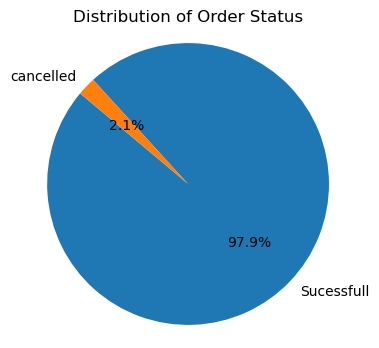

In [68]:
import matplotlib.pyplot as plt

# Assuming 'Order_status' is the column you want to plot
order_status_counts = df['Order_status'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(order_status_counts, labels=order_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Order Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [69]:
customer_data['country']= df.groupby('CustomerID')['Country'].first().reset_index(drop=True)

### 2. This plot displays the world map and marks all the countries from which the transactions are made.

C:\Users\krishna\AppData\Local\Temp\ipykernel_9600\1989784246.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


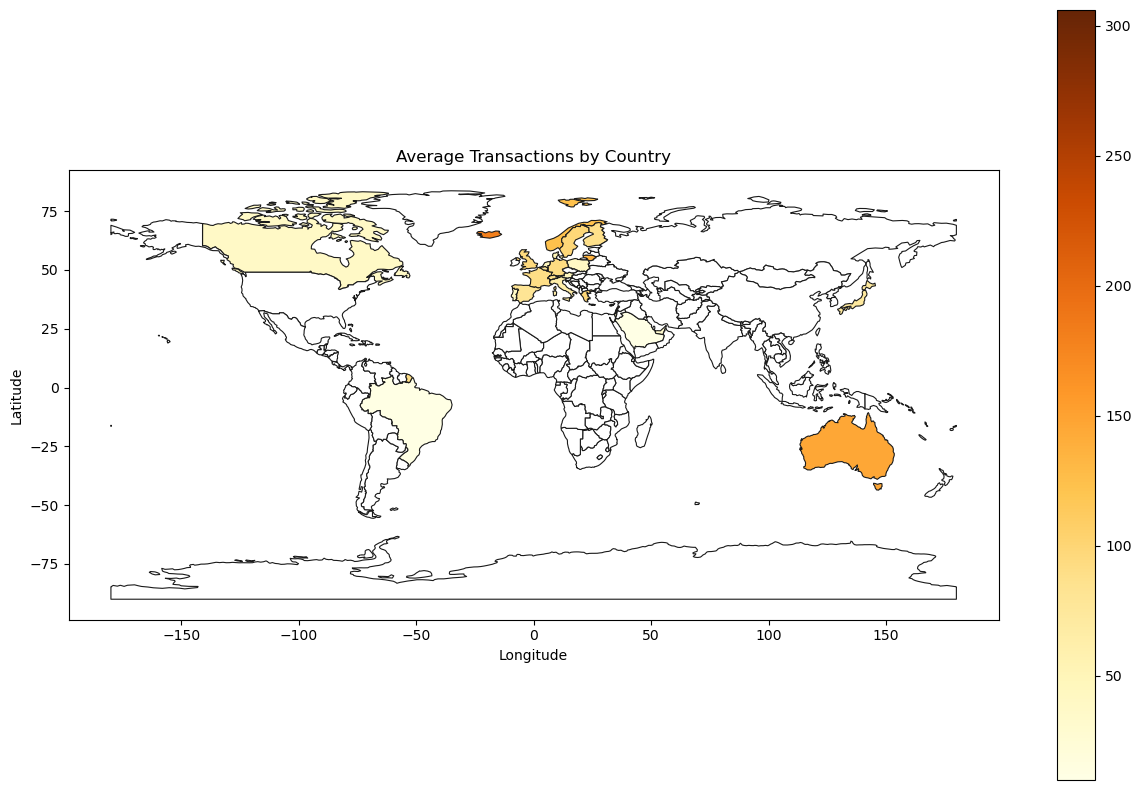

In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
#import mplleaflet

# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Load your DataFrame with average transactions per country
# Assuming customer_data contains the average transactions per country
# Replace 'Total_transactions' with the actual column name containing average transactions
customer = customer_data.groupby('country')['Total_transactions'].mean().reset_index()

# Merge the world dataframe with your data using a left join
world = world.merge(customer, how='left', left_on='name', right_on='country')

# Fill missing values (countries with no transactions) with 0
#world['Total_transactions'] = world['Total_transactions'].fillna(0)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Total_transactions', cmap='YlOrBr', linewidth=0.8, ax=ax, edgecolor='0.1', legend=True,missing_kwds={'color': 'white'})



# Set title and labels
ax.set_title('Average Transactions by Country')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Convert the plot to an interactive Leaflet map
#mplleaflet.display()

# Show plot
plt.show()


In [71]:
df['totalprice']=df['UnitPrice']*df['Quantity']

In [72]:
df['purchase_month']=df.InvoiceDate.dt.month_name()

### 3. This line plot gives the information about average monthly spending

C:\Users\krishna\AppData\Local\Temp\ipykernel_9600\3376250757.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=mon_sum,x='purchase_month',y='totalprice', marker='o', color='b',ci=None)


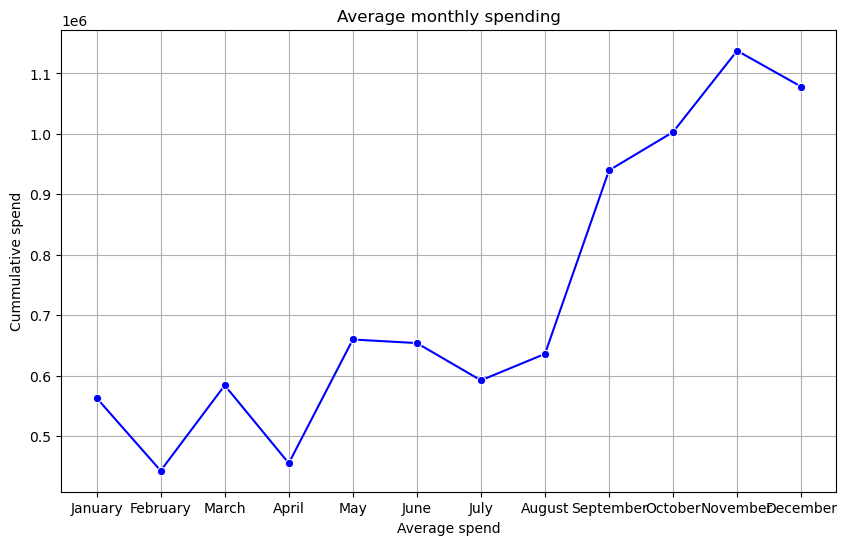

In [73]:
mon_sum= df.groupby('purchase_month')['totalprice'].sum().reset_index()
plt.figure(figsize=(10, 6))
calendar_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
mon_sum['purchase_month'] = pd.Categorical(mon_sum['purchase_month'], categories=calendar_order, ordered=True)
sns.lineplot(data=mon_sum,x='purchase_month',y='totalprice', marker='o', color='b',ci=None)
plt.title('Average monthly spending')
plt.xlabel('Average spend')
plt.ylabel('Cummulative spend')
plt.grid(True)
plt.show()

In [74]:
df['day']=df.InvoiceDate.dt.day_name()

### 4. This line plot gives the information about daily spending trends

C:\Users\krishna\AppData\Local\Temp\ipykernel_9600\1661789965.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=day_sum,x='day',y='totalprice', marker='o', color='b',ci=None)


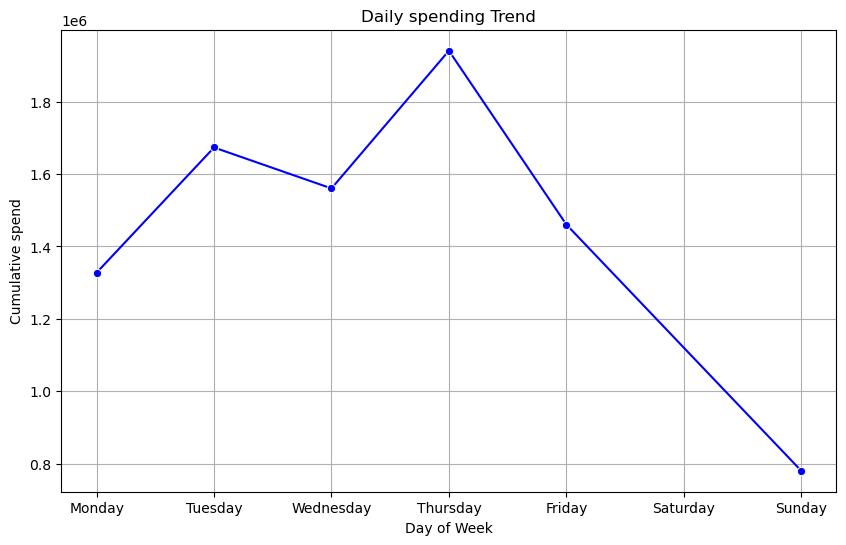

In [75]:
day_sum= df.groupby('day')['totalprice'].sum().reset_index()
plt.figure(figsize=(10, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day_of_week' to categorical with the specified order
day_sum['day'] = pd.Categorical(day_sum['day'], categories=day_order, ordered=True)
sns.lineplot(data=day_sum,x='day',y='totalprice', marker='o', color='b',ci=None)
plt.title('Daily spending Trend')
plt.xlabel('Day of Week')
plt.ylabel('Cumulative spend')


plt.grid(True)
plt.show()

In [76]:
customer_data.drop(['InvoiceDate','country'],inplace=True,axis=1)

In [77]:
top_items = df.groupby('Description')['Quantity'].sum().reset_index()

# Sort the items by the total quantity sold in descending order
top_items = top_items.sort_values(by='Quantity', ascending=False)

# Get the top 10 best selling items
top_10_items = top_items.head(10)

# Print or display the top 10 best selling items
print(top_10_items)


                             Description  Quantity
2324         PAPER CRAFT , LITTLE BIRDIE     80995
1999      MEDIUM CERAMIC TOP STORAGE JAR     77916
3799   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
1768             JUMBO BAG RED RETROSPOT     46078
3710  WHITE HANGING HEART T-LIGHT HOLDER     36706
217        ASSORTED COLOUR BIRD ORNAMENT     35263
2275     PACK OF 72 RETROSPOT CAKE CASES     33670
2607                      POPCORN HOLDER     30919
2663                  RABBIT NIGHT LIGHT     27153
2054             MINI PAINT SET VINTAGE      26076


In [78]:
meanv= df.Quantity.mean()

### 5.The bar chat represents the 10 most sold items out of all products.

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(top_10_items['Description'], top_10_items['Quantity'], color='skyblue')

# Set the title and labels
plt.title('Top 10 Best Selling Items')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
#plt.axhline(y=meanv, color='red', linestyle='--', label='Mean')
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [80]:
top_items = df.groupby('Description')['Quantity'].sum().reset_index()

# Sort the items by the total quantity sold in descending order
top_items = top_items.sort_values(by='Quantity', ascending=False)

# Get the top 10 best selling items
top_10_items = top_items.head(10)

# Print or display the top 10 best selling items
print(top_10_items)

                             Description  Quantity
2324         PAPER CRAFT , LITTLE BIRDIE     80995
1999      MEDIUM CERAMIC TOP STORAGE JAR     77916
3799   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
1768             JUMBO BAG RED RETROSPOT     46078
3710  WHITE HANGING HEART T-LIGHT HOLDER     36706
217        ASSORTED COLOUR BIRD ORNAMENT     35263
2275     PACK OF 72 RETROSPOT CAKE CASES     33670
2607                      POPCORN HOLDER     30919
2663                  RABBIT NIGHT LIGHT     27153
2054             MINI PAINT SET VINTAGE      26076


In [81]:
lst=top_10_items.Description.reset_index(drop=True)
lst

0           PAPER CRAFT , LITTLE BIRDIE
1        MEDIUM CERAMIC TOP STORAGE JAR
2     WORLD WAR 2 GLIDERS ASSTD DESIGNS
3               JUMBO BAG RED RETROSPOT
4    WHITE HANGING HEART T-LIGHT HOLDER
5         ASSORTED COLOUR BIRD ORNAMENT
6       PACK OF 72 RETROSPOT CAKE CASES
7                        POPCORN HOLDER
8                    RABBIT NIGHT LIGHT
9               MINI PAINT SET VINTAGE 
Name: Description, dtype: object

In [82]:
filtered_df = df[df['Description'].isin(lst)]


In [83]:
filtered_df

InvoiceNo StockCode                         Description  Quantity  \
0         536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
9         536367     84879       ASSORTED COLOUR BIRD ORNAMENT        32   
44        536370     22492             MINI PAINT SET VINTAGE         36   
49        536373    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
66        536375    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
...          ...       ...                                 ...       ...   
541678    581538     22197                      POPCORN HOLDER         4   
541824    581579     23084                  RABBIT NIGHT LIGHT        24   
541825    581579     22197                      POPCORN HOLDER        24   
541874    581585     23084                  RABBIT NIGHT LIGHT        12   
541875    581585     84879       ASSORTED COLOUR BIRD ORNAMENT        16   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
9      2010-12-01 08:34:00       1.69     13047.0  United Kingdom   
44     2010-12-01 08:45:00       0.65     12583.0          France   
49     2010-12-01 09:02:00       2.55     17850.0  United Kingdom   
66     2010-12-01 09:32:00       2.55     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
541678 2011-12-09 11:34:00       0.85     14446.0  United Kingdom   
541824 2011-12-09 12:19:00       1.79     17581.0  United Kingdom   
541825 2011-12-09 12:19:00       0.85     17581.0  United Kingdom   
541874 2011-12-09 12:31:00       2.08     15804.0  United Kingdom   
541875 2011-12-09 12:31:00       1.69     15804.0  United Kingdom   

       Order_status  Returned_order_qty  year     month  totalprice  \
0        Sucessfull                   0  2010  December       15.30   
9        Sucessfull                   0  2010  December       54.08   
44       Sucessfull                   0  2010  December       23.40   
49       Sucessfull                   0  2010  December       15.30   
66       Sucessfull                   0  2010  December       15.30   
...             ...                 ...   ...       ...         ...   
541678   Sucessfull                   0  2011  December        3.40   
541824   Sucessfull                   0  2011  December       42.96   
541825   Sucessfull                   0  2011  December       20.40   
541874   Sucessfull                   0  2011  December       24.96   
541875   Sucessfull                   0  2011  December       27.04   

       purchase_month        day  
0            December  Wednesday  
9            December  Wednesday  
44           December  Wednesday  
49           December  Wednesday  
66           December  Wednesday  
...               ...        ...  
541678       December     Friday  
541824       December     Friday  
541825       December     Friday  
541874       December     Friday  
541875       December     Friday  

[8733 rows x 15 columns]

In [84]:
Total_returned_orders=filtered_df.groupby("Description")['UnitPrice'].first().reset_index()

In [85]:
Total_returned_orders = Total_returned_orders.sort_values('UnitPrice', ascending=False)

In [86]:
Total_returned_orders

Description  UnitPrice
8  WHITE HANGING HEART T-LIGHT HOLDER       2.55
5         PAPER CRAFT , LITTLE BIRDIE       2.08
7                  RABBIT NIGHT LIGHT       2.08
0       ASSORTED COLOUR BIRD ORNAMENT       1.69
1             JUMBO BAG RED RETROSPOT       1.65
2      MEDIUM CERAMIC TOP STORAGE JAR       1.04
6                      POPCORN HOLDER       0.85
3             MINI PAINT SET VINTAGE        0.65
4     PACK OF 72 RETROSPOT CAKE CASES       0.42
9   WORLD WAR 2 GLIDERS ASSTD DESIGNS       0.29

In [87]:
mean = df.UnitPrice.mean()

In [88]:
mean

2.9238514339598107

### 6 . Price analysis of top 10 purchased items

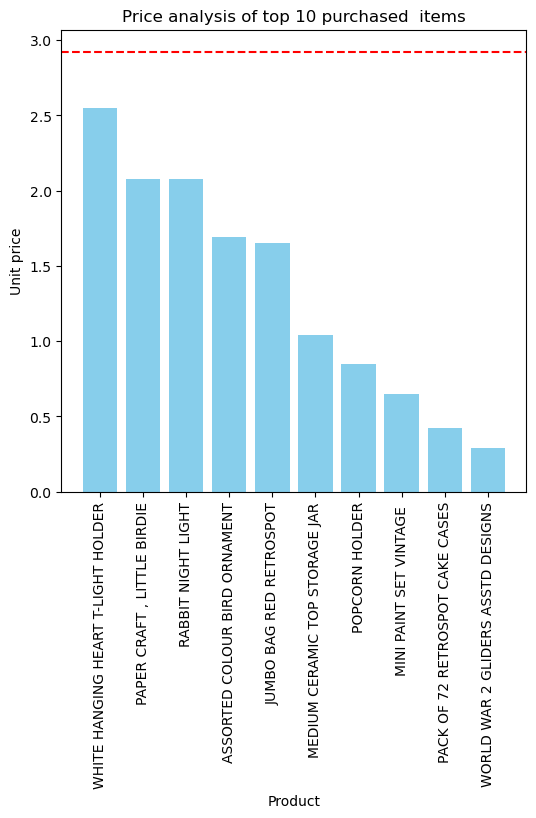

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.bar(Total_returned_orders['Description'],Total_returned_orders['UnitPrice'] , color='skyblue')

# Set the title and labels
plt.title('Price analysis of top 10 purchased  items')
plt.xlabel('Product')
plt.ylabel('Unit price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.axhline(y=mean, color='red', linestyle='--', label='Mean')
# Show the plot
plt.show()


In [90]:
Total_returned_orders=filtered_df.groupby("Description")['Returned_order_qty'].sum().reset_index()

In [91]:
Total_returned_orders = Total_returned_orders.sort_values('Returned_order_qty', ascending=False)

In [92]:
Total_returned_orders

Description  Returned_order_qty
5         PAPER CRAFT , LITTLE BIRDIE               80995
2      MEDIUM CERAMIC TOP STORAGE JAR               74494
8  WHITE HANGING HEART T-LIGHT HOLDER                2578
9   WORLD WAR 2 GLIDERS ASSTD DESIGNS                1200
1             JUMBO BAG RED RETROSPOT                1115
6                      POPCORN HOLDER                 427
4     PACK OF 72 RETROSPOT CAKE CASES                 284
3             MINI PAINT SET VINTAGE                  196
7                  RABBIT NIGHT LIGHT                 108
0       ASSORTED COLOUR BIRD ORNAMENT                  48

### 7. Return Data for top 10 most purchased items

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.bar(Total_returned_orders['Description'],Total_returned_orders['Returned_order_qty'] , color='skyblue')

# Set the title and labels
plt.title('Return data for top 10 purchased  items')
plt.xlabel('Product')
plt.ylabel('Quantity')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
#plt.axhline(y=mean, color='red', linestyle='--', label='Mean')
# Show the plot
plt.show()


### 8.Heatmap

In [94]:
f_copy = customer_data.drop(columns=['CustomerID']).copy()

In [95]:
f_copy

Days_since_Most_rececnt_purchase  Total_transactions  \
0                                  325                   2   
1                                    1                 182   
2                                   74                  27   
3                                   18                  72   
4                                  309                  16   
...                                ...                 ...   
4281                               277                  10   
4282                               180                   7   
4283                                 7                  13   
4284                                 3                 719   
4285                                42                  70   

      total_products_purchased  Total_spend  Average_spend  \
0                        74215     77183.60   38591.800000   
1                         2458      4310.00      23.681319   
2                         2332      1437.24      53.231111   
3                          630      1457.55      20.243750   
4                          196       294.40      18.400000   
...                        ...          ...            ...   
4281                        45       180.60      18.060000   
4282                        54        80.82      11.545714   
4283                       103       178.05      13.696154   
4284                      1355      2039.58       2.836690   
4285                      1586      1837.28      26.246857   

      Unique_products_purchased  Average_days_between_transactions  \
0                             1                           0.000000   
1                           103                           2.000000   
2                            21                          10.846154   
3                            72                           0.000000   
4                            16                           0.000000   
...                         ...                                ...   
4281                         10                           0.000000   
4282                          7                           0.000000   
4283                         12                           9.833333   
4284                        262                           0.455432   
4285                         59                           2.275362   

      Total_cancelled_transactions  cancellation_rate  
0                              1.0           0.500000  
1                              0.0           0.000000  
2                              0.0           0.000000  
3                              0.0           0.000000  
4                              0.0           0.000000  
...                            ...                ...  
4281                           0.0           0.000000  
4282                           0.0           0.000000  
4283                           1.0           0.076923  
4284                           0.0           0.000000  
4285                           0.0           0.000000  

[4286 rows x 9 columns]

In [96]:
correlation_matrix=f_copy.corr().T

In [97]:
correlation_matrix

Days_since_Most_rececnt_purchase  \
Days_since_Most_rececnt_purchase                           1.000000   
Total_transactions                                        -0.203673   
total_products_purchased                                  -0.121751   
Total_spend                                               -0.119754   
Average_spend                                              0.017444   
Unique_products_purchased                                 -0.295418   
Average_days_between_transactions                         -0.083858   
Total_cancelled_transactions                              -0.192698   
cancellation_rate                                          0.084784   

                                   Total_transactions  \
Days_since_Most_rececnt_purchase            -0.203673   
Total_transactions                           1.000000   
total_products_purchased                     0.435882   
Total_spend                                  0.419745   
Average_spend                               -0.012555   
Unique_products_purchased                    0.876709   
Average_days_between_transactions           -0.068408   
Total_cancelled_transactions                 0.634546   
cancellation_rate                           -0.051135   

                                   total_products_purchased  Total_spend  \
Days_since_Most_rececnt_purchase                  -0.121751    -0.119754   
Total_transactions                                 0.435882     0.419745   
total_products_purchased                           1.000000     0.923614   
Total_spend                                        0.923614     1.000000   
Average_spend                                      0.337020     0.322027   
Unique_products_purchased                          0.409125     0.380081   
Average_days_between_transactions                  0.002697     0.001670   
Total_cancelled_transactions                       0.339469     0.334664   
cancellation_rate                                  0.050729     0.047370   

                                   Average_spend  Unique_products_purchased  \
Days_since_Most_rececnt_purchase        0.017444                  -0.295418   
Total_transactions                     -0.012555                   0.876709   
total_products_purchased                0.337020                   0.409125   
Total_spend                             0.322027                   0.380081   
Average_spend                           1.000000                  -0.024526   
Unique_products_purchased              -0.024526                   1.000000   
Average_days_between_transactions       0.078793                  -0.113535   
Total_cancelled_transactions            0.003890                   0.526006   
cancellation_rate                       0.201029                  -0.100091   

                                   Average_days_between_transactions  \
Days_since_Most_rececnt_purchase                           -0.083858   
Total_transactions                                         -0.068408   
total_products_purchased                                    0.002697   
Total_spend                                                 0.001670   
Average_spend                                               0.078793   
Unique_products_purchased                                  -0.113535   
Average_days_between_transactions                           1.000000   
Total_cancelled_transactions                               -0.024033   
cancellation_rate                                           0.226993   

                                   Total_cancelled_transactions  \
Days_since_Most_rececnt_purchase                      -0.192698   
Total_transactions                                     0.634546   
total_products_purchased                               0.339469   
Total_spend                                            0.334664   
Average_spend                                          0.003890   
Unique_products_purchased                              0.526006   
Average_day

The heatmap tells the correlation between the columns

In [98]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [99]:
top_items = df.groupby('Description')['Quantity'].sum().reset_index()

# Sort the items by the total quantity sold in descending order
top_items = top_items.sort_values(by='Quantity', ascending=False)

# Get the top 10 best selling items
top_10_items = top_items.head(10)

# Print or display the top 10 best selling items
print(top_10_items)

                             Description  Quantity
2324         PAPER CRAFT , LITTLE BIRDIE     80995
1999      MEDIUM CERAMIC TOP STORAGE JAR     77916
3799   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
1768             JUMBO BAG RED RETROSPOT     46078
3710  WHITE HANGING HEART T-LIGHT HOLDER     36706
217        ASSORTED COLOUR BIRD ORNAMENT     35263
2275     PACK OF 72 RETROSPOT CAKE CASES     33670
2607                      POPCORN HOLDER     30919
2663                  RABBIT NIGHT LIGHT     27153
2054             MINI PAINT SET VINTAGE      26076


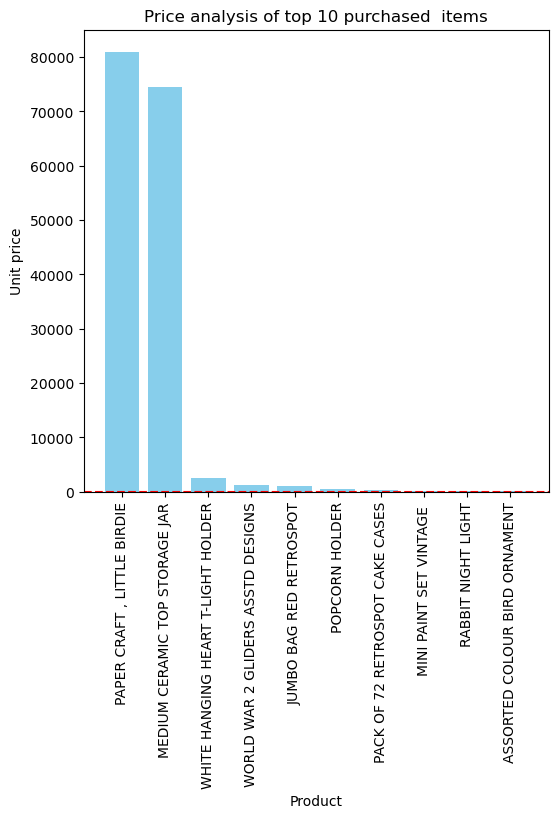

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.bar(Total_returned_orders['Description'],Total_returned_orders['Returned_order_qty'] , color='skyblue')

# Set the title and labels
plt.title('Price analysis of top 10 purchased  items')
plt.xlabel('Product')
plt.ylabel('Unit price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.axhline(y=mean, color='red', linestyle='--', label='Mean')
# Show the plot
plt.show()

In [101]:
top_items = df.groupby('Description')['Returned_order_qty'].sum().reset_index()

# Sort the items by the total quantity sold in descending order
top_items = top_items.sort_values(by='Returned_order_qty', ascending=False)

# Get the top 10 best selling items
top_10_items = top_items.head(10)

# Print or display the top 10 best selling items
print(top_10_items)


                              Description  Returned_order_qty
2324          PAPER CRAFT , LITTLE BIRDIE               80995
1999       MEDIUM CERAMIC TOP STORAGE JAR               74494
2874  ROTATING SILVER ANGELS T-LIGHT HLDR                9367
1165   FAIRY CAKE FLANNEL ASSORTED COLOUR                3150
3710   WHITE HANGING HEART T-LIGHT HOLDER                2578
1393          GIN + TONIC DIET METAL SIGN                2030
1640                    HERB MARKER BASIL                1527
1205                 FELTCRAFT DOLL MOLLY                1447
3430               TEA TIME PARTY BUNTING                1424
2338          PAPER POCKET TRAVELING FAN                 1385


### 9.The bar plot represents 10 most returned products.

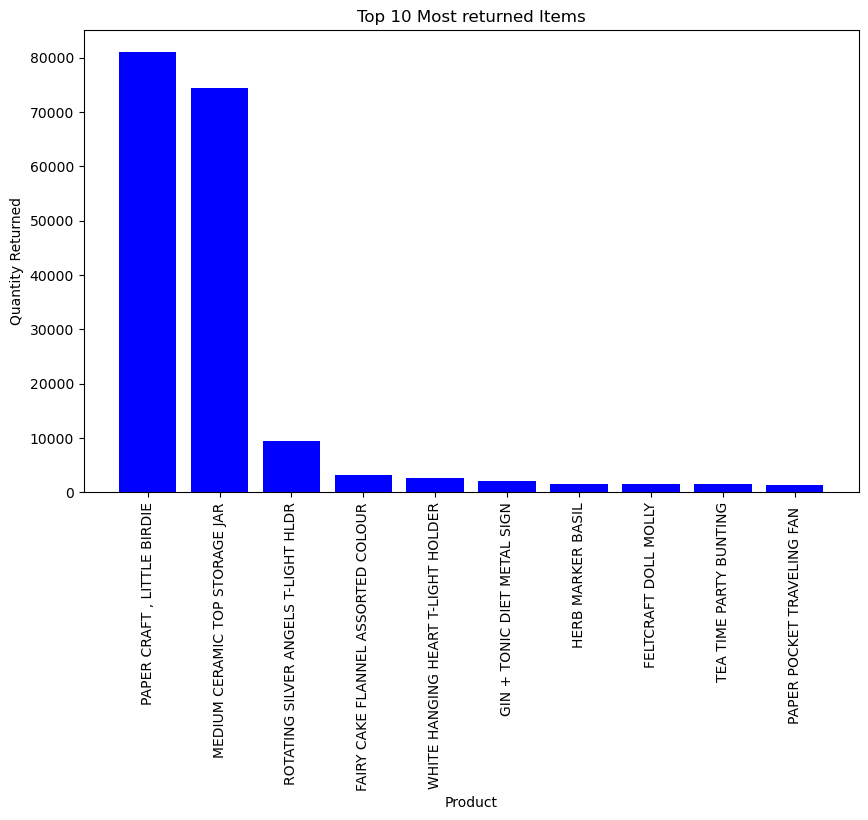

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.bar(top_10_items['Description'], top_10_items['Returned_order_qty'], color='blue')

# Set the title and labels
plt.title('Top 10 Most returned Items')
plt.xlabel('Product')
plt.ylabel('Quantity Returned')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [103]:
top_items = customer_data.copy()

# Sort the items by the total quantity sold in descending order
top_items = top_items.sort_values(by='total_products_purchased', ascending=False)

# Get the top 10 best selling items


# Print or display the top 10 best selling items
top_items=top_items.head(10)

In [104]:
top_items.set_index('CustomerID', inplace=True)

In [105]:
top_items

Days_since_Most_rececnt_purchase  Total_transactions  \
CustomerID                                                         
14646.0                                    1                2062   
16446.0                                    0                   4   
14911.0                                    0                5891   
12415.0                                   23                 774   
12346.0                                  325                   2   
17450.0                                    7                 339   
17511.0                                    2                1074   
18102.0                                    0                 431   
13694.0                                    3                 581   
14298.0                                    2                1640   

            total_products_purchased  Total_spend  Average_spend  \
CustomerID                                                         
14646.0                       196844    279138.02     135.372464   
16446.0                        80997    168472.50   42118.125000   
14911.0                        80238    140336.83      23.822242   
12415.0                        77373    124564.53     160.936085   
12346.0                        74215     77183.60   38591.800000   
17450.0                        69973    194390.79     573.424159   
17511.0                        64549     91062.38      84.788063   
18102.0                        64124    259657.30     602.453132   
13694.0                        63312     65039.62     111.944269   
14298.0                        58343     51527.30      31.419085   

            Unique_products_purchased  Average_days_between_transactions  \
CustomerID                                                                 
14646.0                           699                           0.159146   
16446.0                             3                          68.000000   
14911.0                          1792                           0.047708   
12415.0                           443                           0.390686   
12346.0                             1                           0.000000   
17450.0                           124                           1.023669   
17511.0                           465                           0.326188   
18102.0                           150                           0.823256   
13694.0                           367                           0.598276   
14298.0                           884                           0.211714   

            Total_cancelled_transactions  cancellation_rate  
CustomerID                                                   
14646.0                              1.0           0.000485  
16446.0                              1.0           0.250000  
14911.0                             44.0           0.007469  
12415.0                              4.0           0.005168  
12346.0                              1.0           0.500000  
17450.0                              3.0           0.008850  
17511.0                             14.0           0.013035  
18102.0                              0.0           0.000000  
13694.0                              7.0           0.012048  
14298.0                              1.0           0.000610

In [106]:
a= customer_data.Unique_products_purchased.mean()

In [107]:
a

62.26061595893607

### 10. This bar plot represent the unique products purchased by top customers

In [108]:
plt.figure(figsize=(10, 6))

# Bar plot for Unique_products_purchased using Seaborn
sns.barplot(x=top_items.index, y='Unique_products_purchased', data=top_items, palette='viridis')

# Adding labels and title
plt.xlabel('Customer ID', fontsize=14)
plt.ylabel('Unique Products Purchased', fontsize=14)
plt.title('Unique Products Purchased by Top Customers', fontsize=16)
plt.axhline(y=a, color='red', linestyle='--', label='Average')
# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [109]:
a= customer_data.Average_days_between_transactions.mean()

### 11.This bar plot gives the information about how frequently the customer is odering the products

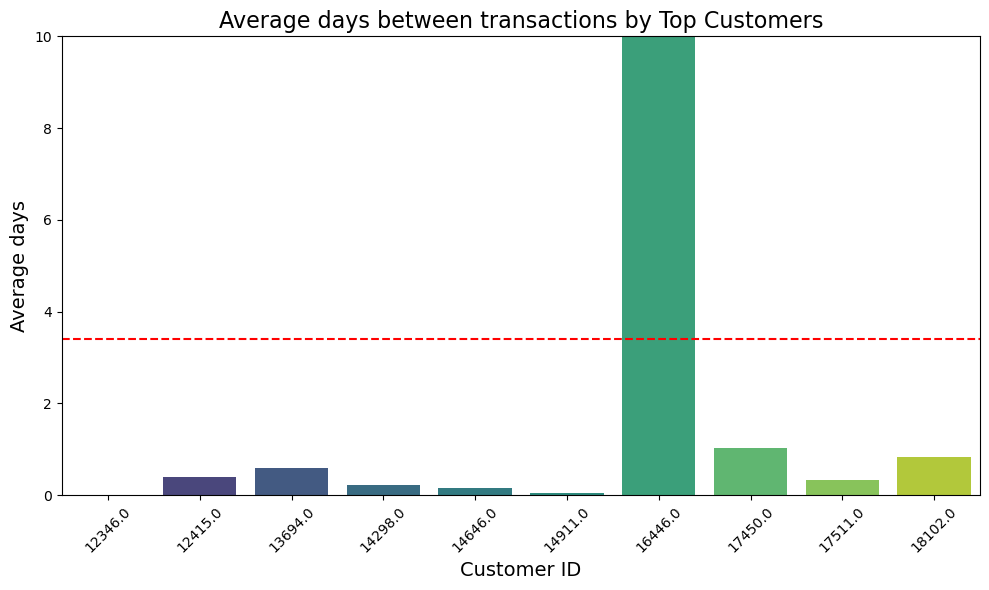

In [110]:
plt.figure(figsize=(10, 6))

# Bar plot for Unique_products_purchased using Seaborn
sns.barplot(x=top_items.index, y='Average_days_between_transactions', data=top_items, palette='viridis')

# Adding labels and title
plt.xlabel('Customer ID', fontsize=14)
plt.ylabel('Average days', fontsize=14)
plt.title('Average days between transactions by Top Customers', fontsize=16)
plt.axhline(y=a, color='red', linestyle='--', label='Average')
# Rotating x-axis labels for better readability
plt.xticks(rotation=45)
plt.ylim(0, 10)
# Show plot
plt.tight_layout()
plt.show()

In [111]:
a= customer_data.cancellation_rate.mean()

In [112]:
a

0.013719653063828142

### 12. This plot gives the information how , frequently the top customers are returning the products

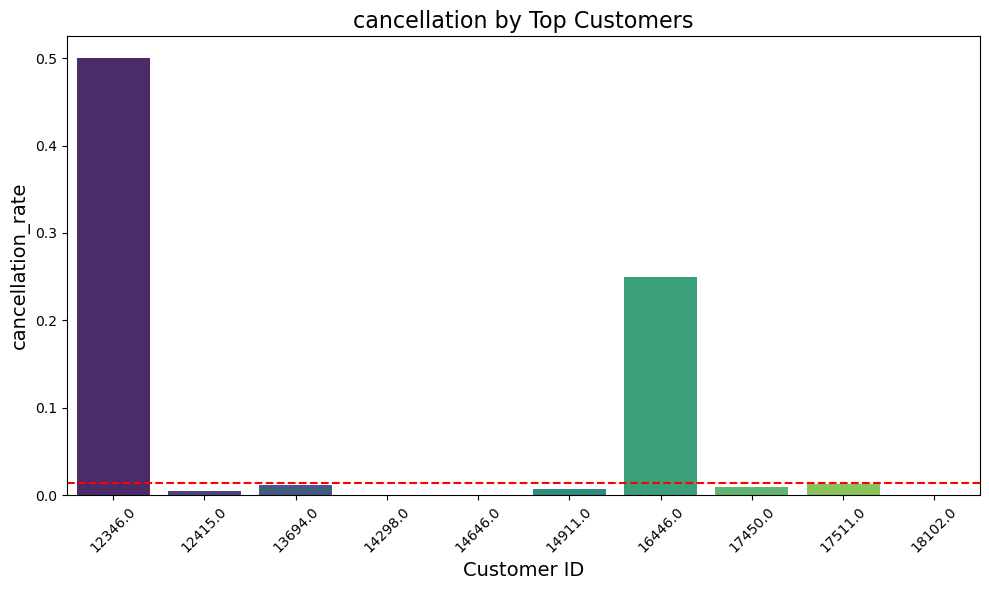

In [113]:
plt.figure(figsize=(10, 6))

# Bar plot for Unique_products_purchased using Seaborn
sns.barplot(x=top_items.index, y='cancellation_rate', data=top_items, palette='viridis')

# Adding labels and title
plt.xlabel('Customer ID', fontsize=14)
plt.ylabel('cancellation_rate', fontsize=14)
plt.title('cancellation by Top Customers', fontsize=16)
plt.axhline(y=a, color='red', linestyle='--', label='Average')
# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

### 13. Comparison of Total Transactions and Average spend Purchased for Top Customers

In [114]:
import numpy as np
import matplotlib.pyplot as plt

# Create an array of indices for the x-coordinates
x = np.arange(len(top_items))

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for Total transactions
plt.bar(x - 0.2, top_items['Average_spend'], color='blue', width=0.4, label='Average_spend')

# Bar plot for Unique products purchased
plt.bar(x + 0.2, top_items['Total_transactions'], color='orange', width=0.4, label='Total_transactions')

# Adding labels and title
plt.xlabel('Customer ID', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Comparison of Total Transactions and Average spend Purchased for Top Customers', fontsize=16)

# Setting x-axis ticks and labels
plt.xticks(x, top_items.index, rotation=45)

# Adding legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [115]:
customer_data.head()

CustomerID  Days_since_Most_rececnt_purchase  Total_transactions  \
0     12346.0                               325                   2   
1     12347.0                                 1                 182   
2     12348.0                                74                  27   
3     12349.0                                18                  72   
4     12350.0                               309                  16   

   total_products_purchased  Total_spend  Average_spend  \
0                     74215     77183.60   38591.800000   
1                      2458      4310.00      23.681319   
2                      2332      1437.24      53.231111   
3                       630      1457.55      20.243750   
4                       196       294.40      18.400000   

   Unique_products_purchased  Average_days_between_transactions  \
0                          1                           0.000000   
1                        103                           2.000000   
2                         21                          10.846154   
3                         72                           0.000000   
4                         16                           0.000000   

   Total_cancelled_transactions  cancellation_rate  
0                           1.0                0.5  
1                           0.0                0.0  
2                           0.0                0.0  
3                           0.0                0.0  
4                           0.0                0.0

In [116]:
customer_data

CustomerID  Days_since_Most_rececnt_purchase  Total_transactions  \
0        12346.0                               325                   2   
1        12347.0                                 1                 182   
2        12348.0                                74                  27   
3        12349.0                                18                  72   
4        12350.0                               309                  16   
...          ...                               ...                 ...   
4281     18280.0                               277                  10   
4282     18281.0                               180                   7   
4283     18282.0                                 7                  13   
4284     18283.0                                 3                 719   
4285     18287.0                                42                  70   

      total_products_purchased  Total_spend  Average_spend  \
0                        74215     77183.60   38591.800000   
1                         2458      4310.00      23.681319   
2                         2332      1437.24      53.231111   
3                          630      1457.55      20.243750   
4                          196       294.40      18.400000   
...                        ...          ...            ...   
4281                        45       180.60      18.060000   
4282                        54        80.82      11.545714   
4283                       103       178.05      13.696154   
4284                      1355      2039.58       2.836690   
4285                      1586      1837.28      26.246857   

      Unique_products_purchased  Average_days_between_transactions  \
0                             1                           0.000000   
1                           103                           2.000000   
2                            21                          10.846154   
3                            72                           0.000000   
4                            16                           0.000000   
...                         ...                                ...   
4281                         10                           0.000000   
4282                          7                           0.000000   
4283                         12                           9.833333   
4284                        262                           0.455432   
4285                         59                           2.275362   

      Total_cancelled_transactions  cancellation_rate  
0                              1.0           0.500000  
1                              0.0           0.000000  
2                              0.0           0.000000  
3                              0.0           0.000000  
4                              0.0           0.000000  
...                            ...                ...  
4281                           0.0           0.000000  
4282                           0.0           0.000000  
4283                           1.0           0.076923  
4284                           0.0           0.000000  
4285                           0.0           0.000000  

[4286 rows x 10 columns]

In [117]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
customer_data.head()


CustomerID  Days_since_Most_rececnt_purchase  Total_transactions  \
0     12346.0                               325                   2   
1     12347.0                                 1                 182   
2     12348.0                                74                  27   
3     12349.0                                18                  72   
4     12350.0                               309                  16   

   total_products_purchased  Total_spend  Average_spend  \
0                     74215     77183.60   38591.800000   
1                      2458      4310.00      23.681319   
2                      2332      1437.24      53.231111   
3                       630      1457.55      20.243750   
4                       196       294.40      18.400000   

   Unique_products_purchased  Average_days_between_transactions  \
0                          1                           0.000000   
1                        103                           2.000000   
2                         21                          10.846154   
3                         72                           0.000000   
4                         16                           0.000000   

   Total_cancelled_transactions  cancellation_rate  Outlier_Scores  Is_Outlier  
0                           1.0                0.5              -1           1  
1                           0.0                0.0               1           0  
2                           0.0                0.0               1           0  
3                           0.0                0.0               1           0  
4                           0.0                0.0               1           0

In [118]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)


In [119]:
outliers_data

CustomerID  Days_since_Most_rececnt_purchase  Total_transactions  \
0        12346.0                               325                   2   
50       12409.0                                78                 114   
55       12415.0                                23                 774   
71       12433.0                                 0                 420   
100      12471.0                                 1                 508   
...          ...                               ...                 ...   
4239     18223.0                                 1                 298   
4257     18246.0                                23                   4   
4261     18251.0                                86                  16   
4264     18256.0                               354                   4   
4276     18273.0                                 1                   3   

      total_products_purchased  Total_spend  Average_spend  \
0                        74215     77183.60   38591.800000   
50                        5551     11072.67      97.128684   
55                       77373    124564.53     160.936085   
71                       11071     13375.87      31.847310   
100                       8092     17388.65      34.229626   
...                        ...          ...            ...   
4239                      2948      6484.54      21.760201   
4257                       166       596.10     149.025000   
4261                      7824      4314.72     269.670000   
4264                         0         0.00       0.000000   
4276                        80       204.00      68.000000   

      Unique_products_purchased  Average_days_between_transactions  \
0                             1                           0.000000   
50                           91                           0.902655   
55                          443                           0.390686   
71                          219                           0.883055   
100                         150                           0.696252   
...                         ...                                ...   
4239                        118                           1.154882   
4257                          3                          69.666667   
4261                         16                           0.000000   
4264                          4                           0.000000   
4276                          1                         127.500000   

      Total_cancelled_transactions  cancellation_rate  Outlier_Scores  \
0                              1.0           0.500000              -1   
50                             4.0           0.035088              -1   
55                             4.0           0.005168              -1   
71                             0.0           0.000000              -1   
100                           18.0           0.035433              -1   
...                            ...                ...             ...   
4239                          12.0           0.040268              -1   
4257                           0.0           0.000000              -1   
4261                           0.0           0.000000              -1   
4264                           1.0           0.250000              -1   
4276                           0.0           0.000000              -1   

      Is_Outlier  
0              1  
50             1  
55             1  
71             1  
100            1  
...          ...  
4239           1  
4257           1  
4261           1  
4264           1  
4276           1  

[215 rows x 12 columns]

In [120]:
customer_data_cleaned.head()

CustomerID  Days_since_Most_rececnt_purchase  Total_transactions  \
0     12347.0                                 1                 182   
1     12348.0                                74                  27   
2     12349.0                                18                  72   
3     12350.0                               309                  16   
4     12352.0                                35                  84   

   total_products_purchased  Total_spend  Average_spend  \
0                      2458      4310.00      23.681319   
1                      2332      1437.24      53.231111   
2                       630      1457.55      20.243750   
3                       196       294.40      18.400000   
4                       526      1385.74      16.496905   

   Unique_products_purchased  Average_days_between_transactions  \
0                        103                           2.000000   
1                         21                          10.846154   
2                         72                           0.000000   
3                         16                           0.000000   
4                         57                           3.108434   

   Total_cancelled_transactions  cancellation_rate  
0                           0.0           0.000000  
1                           0.0           0.000000  
2                           0.0           0.000000  
3                           0.0           0.000000  
4                           1.0           0.011905

In [121]:
cust_index = customer_data_cleaned['CustomerID']

In [122]:
cust_id = customer_data_cleaned['CustomerID']
customer_data_cleaned.set_index('CustomerID', inplace=True)

In [123]:
col_names= customer_data_cleaned.columns

In [124]:
customer_data_cleaned

Days_since_Most_rececnt_purchase  Total_transactions  \
CustomerID                                                         
12347.0                                    1                 182   
12348.0                                   74                  27   
12349.0                                   18                  72   
12350.0                                  309                  16   
12352.0                                   35                  84   
...                                      ...                 ...   
18280.0                                  277                  10   
18281.0                                  180                   7   
18282.0                                    7                  13   
18283.0                                    3                 719   
18287.0                                   42                  70   

            total_products_purchased  Total_spend  Average_spend  \
CustomerID                                                         
12347.0                         2458      4310.00      23.681319   
12348.0                         2332      1437.24      53.231111   
12349.0                          630      1457.55      20.243750   
12350.0                          196       294.40      18.400000   
12352.0                          526      1385.74      16.496905   
...                              ...          ...            ...   
18280.0                           45       180.60      18.060000   
18281.0                           54        80.82      11.545714   
18282.0                          103       178.05      13.696154   
18283.0                         1355      2039.58       2.836690   
18287.0                         1586      1837.28      26.246857   

            Unique_products_purchased  Average_days_between_transactions  \
CustomerID                                                                 
12347.0                           103                           2.000000   
12348.0                            21                          10.846154   
12349.0                            72                           0.000000   
12350.0                            16                           0.000000   
12352.0                            57                           3.108434   
...                               ...                                ...   
18280.0                            10                           0.000000   
18281.0                             7                           0.000000   
18282.0                            12                           9.833333   
18283.0                           262                           0.455432   
18287.0                            59                           2.275362   

            Total_cancelled_transactions  cancellation_rate  
CustomerID                                                   
12347.0                              0.0           0.000000  
12348.0                              0.0           0.000000  
12349.0                              0.0           0.000000  
12350.0                              0.0           0.000000  
12352.0                              1.0           0.011905  
...                                  ...                ...  
18280.0                              0.0           0.000000  
18281.0                              0.0           0.000000  
18282.0                              1.0           0.076923  
18283.0                              0.0           0.000000  
18287.0                              0.0           0.000000  

[4071 rows x 9 columns]

# Project Phase 2

# DataScaling

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df=scaler.fit_transform(customer_data_cleaned)

In [126]:
df_scaled= pd.DataFrame(scaled_df,columns= col_names,index=cust_index)

In [127]:
df_scaled.head()

Days_since_Most_rececnt_purchase  Total_transactions  \
CustomerID                                                         
12347.0                            -0.905420            1.208868   
12348.0                            -0.164610           -0.531914   
12349.0                            -0.732903           -0.026525   
12350.0                             2.220189           -0.655453   
12352.0                            -0.560386            0.108245   

            total_products_purchased  Total_spend  Average_spend  \
CustomerID                                                         
12347.0                     1.823195     2.031285       0.073716   
12348.0                     1.691038     0.153874       1.227668   
12349.0                    -0.094132     0.167147      -0.060525   
12350.0                    -0.549339    -0.592996      -0.132525   
12352.0                    -0.203214     0.120218      -0.206843   

            Unique_products_purchased  Average_days_between_transactions  \
CustomerID                                                                 
12347.0                      0.817479                          -0.126239   
12348.0                     -0.607317                           1.542344   
12349.0                      0.278837                          -0.503484   
12350.0                     -0.694194                          -0.503484   
12352.0                      0.018204                           0.082837   

            Total_cancelled_transactions  cancellation_rate  
CustomerID                                                   
12347.0                        -0.530519          -0.394608  
12348.0                        -0.530519          -0.394608  
12349.0                        -0.530519          -0.394608  
12350.0                        -0.530519          -0.394608  
12352.0                         0.369374           0.048287

In [128]:
df_scaled

Days_since_Most_rececnt_purchase  Total_transactions  \
CustomerID                                                         
12347.0                            -0.905420            1.208868   
12348.0                            -0.164610           -0.531914   
12349.0                            -0.732903           -0.026525   
12350.0                             2.220189           -0.655453   
12352.0                            -0.560386            0.108245   
...                                      ...                 ...   
18280.0                             1.895451           -0.722838   
18281.0                             0.911087           -0.756531   
18282.0                            -0.844532           -0.689146   
18283.0                            -0.885124            7.239837   
18287.0                            -0.489349           -0.048987   

            total_products_purchased  Total_spend  Average_spend  \
CustomerID                                                         
12347.0                     1.823195     2.031285       0.073716   
12348.0                     1.691038     0.153874       1.227668   
12349.0                    -0.094132     0.167147      -0.060525   
12350.0                    -0.549339    -0.592996      -0.132525   
12352.0                    -0.203214     0.120218      -0.206843   
...                              ...          ...            ...   
18280.0                    -0.707718    -0.667367      -0.145803   
18281.0                    -0.698278    -0.732575      -0.400193   
18282.0                    -0.646884    -0.669033      -0.316216   
18283.0                     0.666296     0.547517      -0.740290   
18287.0                     0.908584     0.415309       0.173903   

            Unique_products_purchased  Average_days_between_transactions  \
CustomerID                                                                 
12347.0                      0.817479                          -0.126239   
12348.0                     -0.607317                           1.542344   
12349.0                      0.278837                          -0.503484   
12350.0                     -0.694194                          -0.503484   
12352.0                      0.018204                           0.082837   
...                               ...                                ...   
18280.0                     -0.798448                          -0.503484   
18281.0                     -0.850574                          -0.503484   
18282.0                     -0.763697                           1.351303   
18283.0                      3.580193                          -0.417579   
18287.0                      0.052955                          -0.074299   

            Total_cancelled_transactions  cancellation_rate  
CustomerID                                                   
12347.0                        -0.530519          -0.394608  
12348.0                        -0.530519          -0.394608  
12349.0                        -0.530519          -0.394608  
12350.0                        -0.530519          -0.394608  
12352.0                         0.369374           0.048287  
...                                  ...                ...  
18280.0                        -0.530519          -0.394608  
18281.0                        -0.530519          -0.394608  
18282.0                         0.369374           2.467178  
18283.0                        -0.530519          -0.394608  
18287.0                        -0.530519          -0.394608  

[4071 rows x 9 columns]

# Data Model Building

# Principal Component Analysis

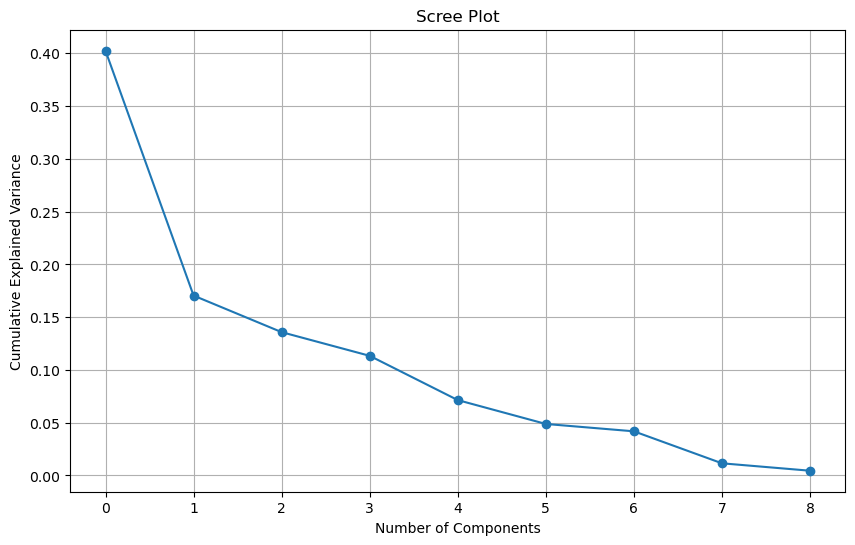

Number of components to explain 90% variance: 7


In [129]:
import numpy as np
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()
pca.fit(df_scaled)

# Find the number of components to explain 80% of the variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

# Plot the scree plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Print the number of components
print("Number of components to explain 90% variance:", n_components)


In [130]:
pca = PCA(n_components=n_components)
pca.fit(df_scaled)
pca_data = pca.transform(df_scaled)
df_pca = pd.DataFrame(pca_data, columns=[f'PC{i}' for i in range(1, n_components + 1)])
df_pca.index = df_scaled.index

In [131]:
df_pca

PC1       PC2       PC3       PC4       PC5       PC6  \
CustomerID                                                               
12347.0     2.770125 -0.345639  1.248810 -0.043251 -0.074666 -0.210431   
12348.0     0.078732  1.335945  2.020660  0.226074  0.565171 -0.522761   
12349.0     0.200579 -0.642861  0.382371  0.274341 -0.729497  0.150269   
12350.0    -1.842261 -0.752903 -0.150567 -1.443592  1.040491 -0.214556   
12352.0     0.277136  0.133019 -0.247478  0.449734 -0.325038 -0.138197   
...              ...       ...       ...       ...       ...       ...   
18280.0    -1.943373 -0.708453 -0.155975 -1.208532  0.761033 -0.221862   
18281.0    -1.753030 -0.705391 -0.186262 -0.504523  0.072568 -0.357011   
18282.0    -0.991748  2.221844 -1.491995  1.354825 -0.222529  0.392913   
18283.0     5.696197 -3.155923 -0.491495  1.342450  1.427299  3.549761   
18287.0     0.563313 -0.165095  0.880792  0.027619 -0.297284 -0.255637   

                 PC7  
CustomerID            
12347.0     1.150714  
12348.0     0.619128  
12349.0     0.196337  
12350.0    -0.074354  
12352.0    -0.204132  
...              ...  
18280.0    -0.115383  
18281.0     0.006790  
18282.0     0.772774  
18283.0    -0.521894  
18287.0     0.602381  

[4071 rows x 7 columns]

In [132]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# 1. K- Means Clustering 

# Determining the number of clusters - 

# Elbow Plot

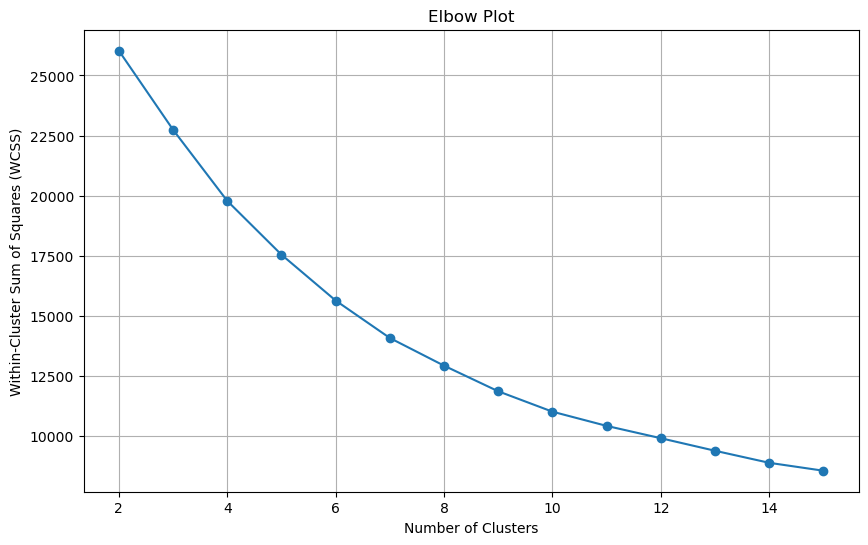

In [133]:
## Elbow Plots
from sklearn.cluster import KMeans
# Plot the Elbow plot for KMeans
wcss = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 16), wcss, marker='o', linestyle='-')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

# Gap Statistics

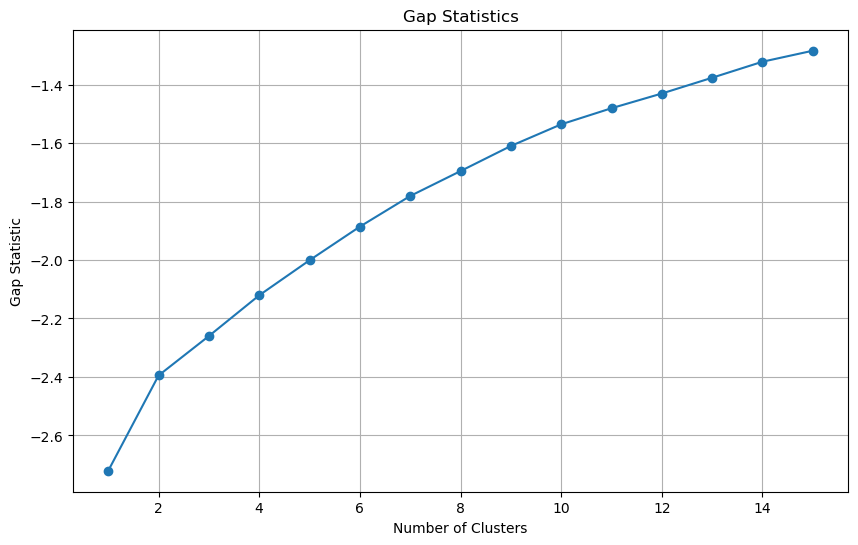

In [134]:
## Calculating Gap Statistics
from scipy.spatial.distance import pdist
def gap_statistic(X, k_max, B=10):
    gap_stats = np.zeros(k_max)
    ref_dispersions = []
    for _ in range(B):
        X_ref = np.random.rand(*X.shape)
        kmeans_ref = KMeans(n_clusters=k_max, random_state=42)
        kmeans_ref.fit(X_ref)
        ref_dispersion = np.log(np.sum(pdist(X_ref)**2) / X_ref.shape[0])
        ref_dispersions.append(ref_dispersion)
    
    for k in range(1, k_max + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        dispersion = np.log(kmeans.inertia_)
        gap = np.mean(ref_dispersions) - dispersion
        gap_stats[k - 1] = gap
    
    return gap_stats

gap_stats = gap_statistic(df_pca, k_max=15)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), gap_stats, marker='o', linestyle='-')
plt.title('Gap Statistics')
plt.xlabel('Number of Clusters')
plt.ylabel('Gap Statistic')
plt.grid(True)
plt.show()

# Silhouette score for varying number of clusters

For n_clusters = 2, the average silhouette_score is : 0.4266127673756153
For n_clusters = 3, the average silhouette_score is : 0.24705717015070602
For n_clusters = 4, the average silhouette_score is : 0.26841247617821024
For n_clusters = 5, the average silhouette_score is : 0.2853468578928296
For n_clusters = 6, the average silhouette_score is : 0.27945055904484367
For n_clusters = 7, the average silhouette_score is : 0.2894632075128452
For n_clusters = 8, the average silhouette_score is : 0.29528890075286723
For n_clusters = 9, the average silhouette_score is : 0.29330561775564845
For n_clusters = 10, the average silhouette_score is : 0.2990837493685567


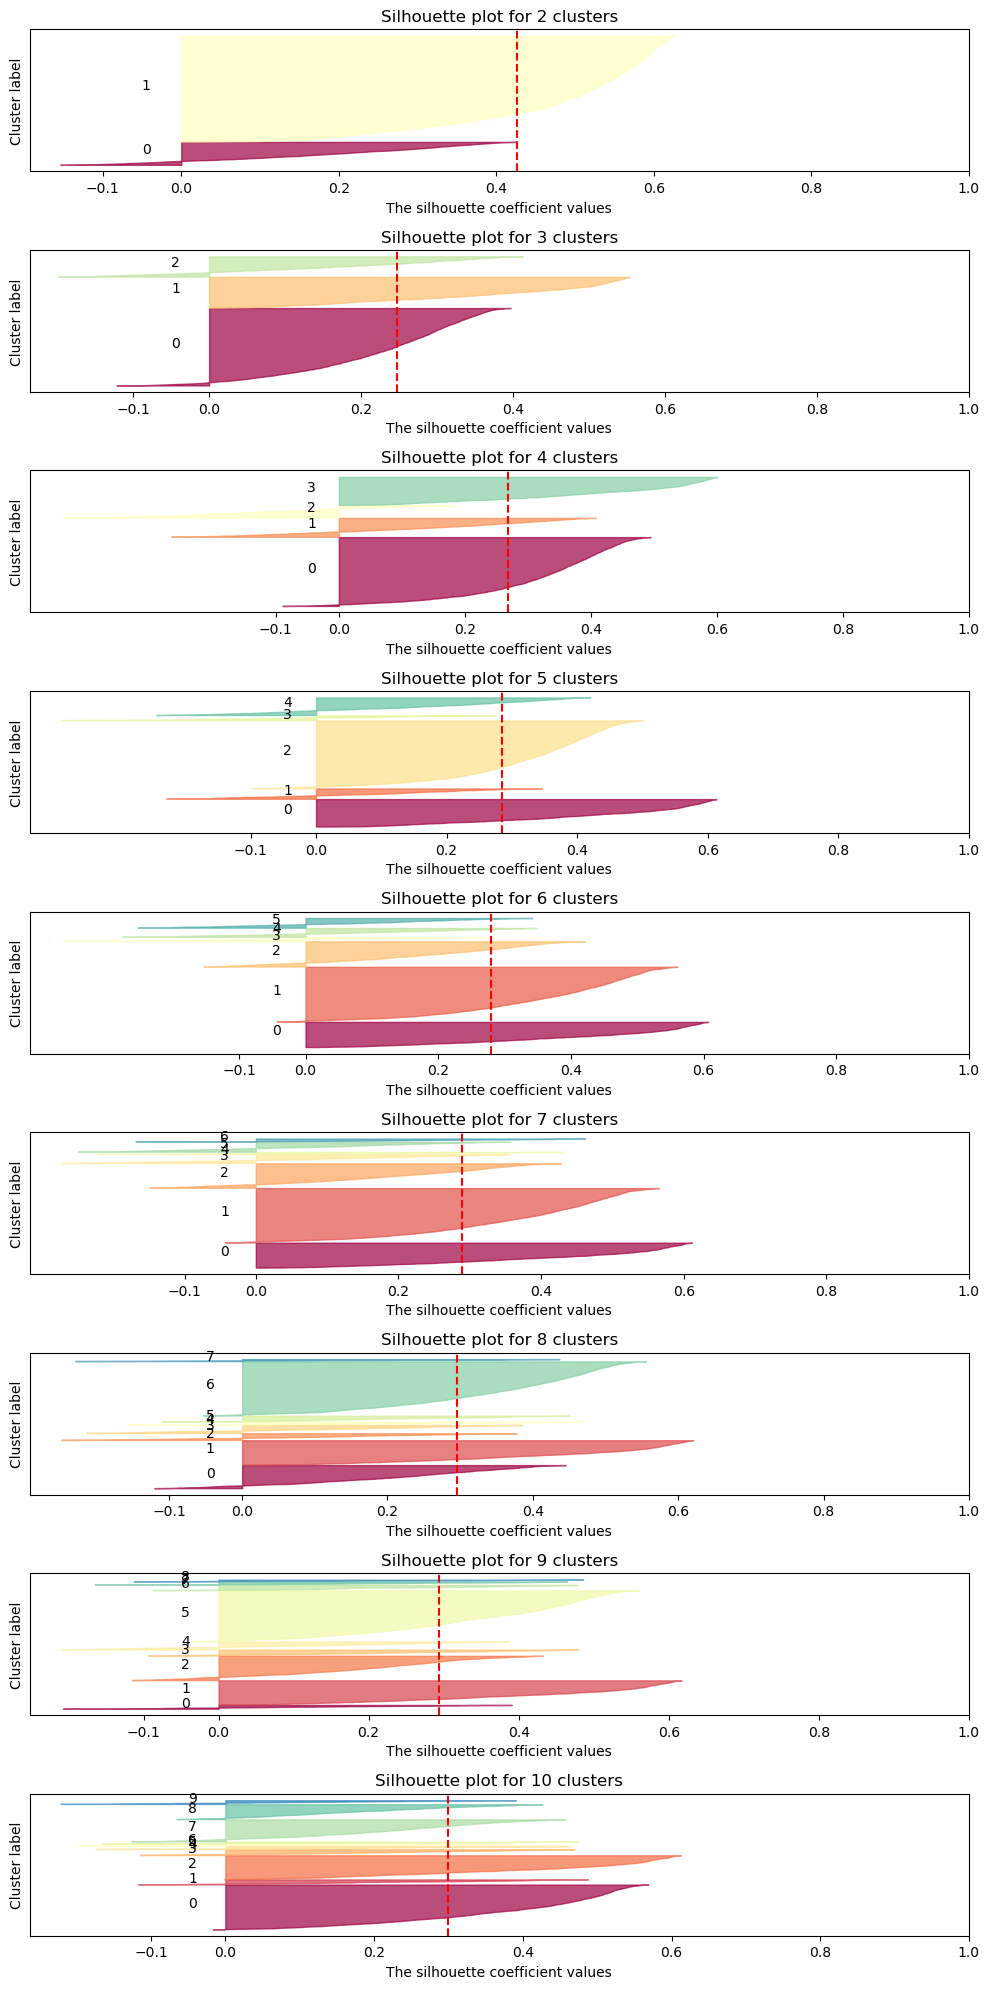

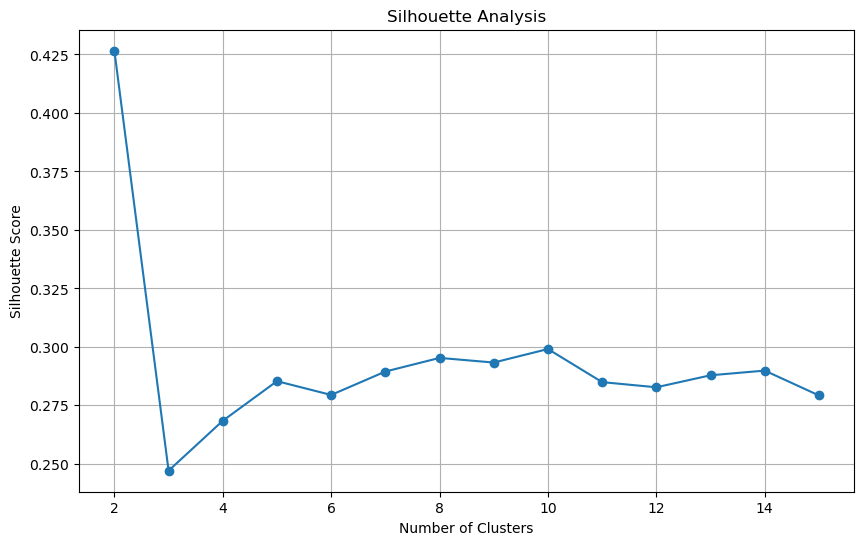

In [135]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
#Silhouette score 
range_n_clusters = range(2, 11)

# Initialize the subplot grid
fig, ax = plt.subplots(len(range_n_clusters), 1, figsize=(10, 20))

# Loop through each number of clusters
for i, n_clusters in enumerate(range_n_clusters):

    # Initialize the KMeans model with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)

    # Compute the silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)

    y_lower = 10
    for j in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster j and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        ith_cluster_silhouette_values.sort()

        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = plt.cm.get_cmap("Spectral")(float(j) / n_clusters)
        ax[i].fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax[i].set_title(f"Silhouette plot for {n_clusters} clusters")
    ax[i].set_xlabel("The silhouette coefficient values")
    ax[i].set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax[i].axvline(x=silhouette_avg, color="red", linestyle="--")

    ax[i].set_yticks([])  # Clear the yaxis labels / ticks
    ax[i].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.tight_layout()
plt.show()
##
# Plot Silhouette scores for each number of clusters
silhouette_scores = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 16), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()



# clustering Data with into 8 clusters

In [136]:
# Cluster the data with 8 clusters
kmeans_8 = KMeans(n_clusters=8, random_state=42)
kmeans_8.fit(df_scaled)
cluster_labels_8 = kmeans_8.labels_

# Evaluation Metrics for the model built

In [137]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(df_scaled, cluster_labels_8)

# Calculate Davies-Bouldin Index
davies_bouldin_idx = davies_bouldin_score(df_scaled, cluster_labels_8)

# Calculate Calinski-Harabasz Index
calinski_harabasz_idx = calinski_harabasz_score(df_scaled, cluster_labels_8)

print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin_idx)
print("Calinski-Harabasz Index:", calinski_harabasz_idx)


Silhouette Score: 0.29528890075286723
Davies-Bouldin Index: 1.1086756404374543
Calinski-Harabasz Index: 993.2335120408067


# 3-D plot to visualize the clusters

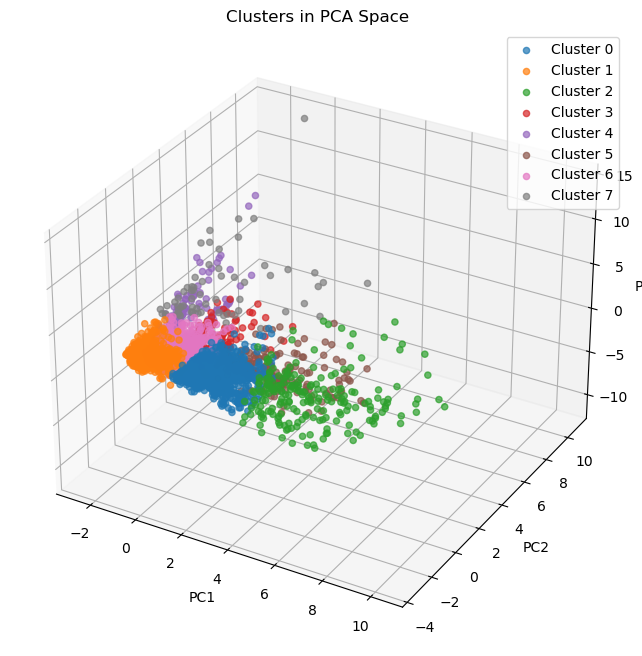

In [138]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Iterate over unique clusters
for cluster in np.unique(cluster_labels_8):
    # Use boolean indexing with iloc to select rows based on cluster labels
    cluster_points = df_pca.iloc[cluster_labels_8 == cluster]

    # Plot points for the current cluster
    ax.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], cluster_points.iloc[:, 2],
               label=f'Cluster {cluster}', alpha=0.7)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.title('Clusters in PCA Space')
plt.show()

# 2- D visualization of clusters

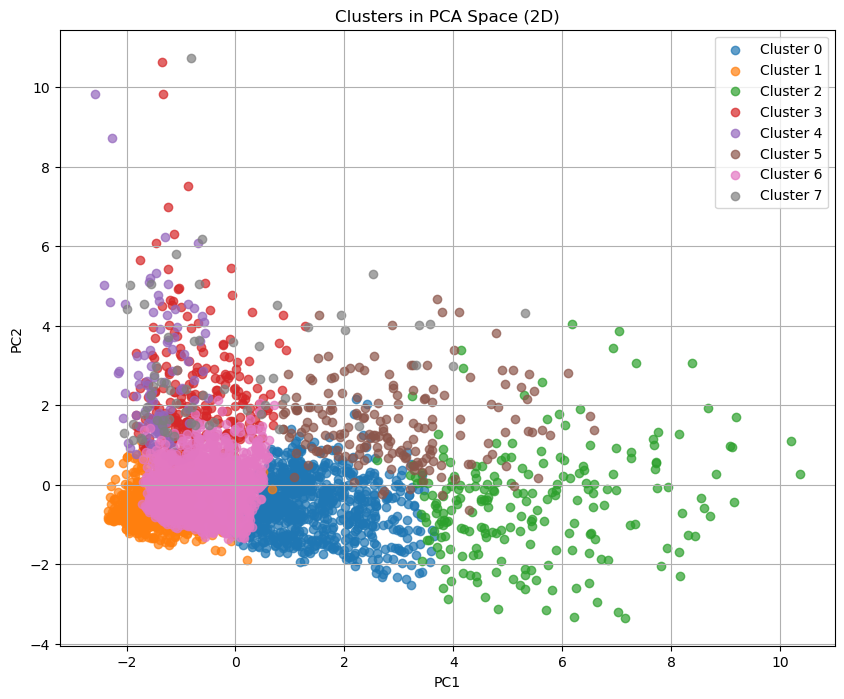

In [139]:
# Select two principal components with the highest explained variance
pc1_index = 0  # Index of the first principal component
pc2_index = 1  # Index of the second principal component

# Plot the clusters in 2D
plt.figure(figsize=(10, 8))

# Iterate over unique clusters
for cluster in np.unique(cluster_labels_8):
    # Use boolean indexing with iloc to select rows based on cluster labels
    cluster_points = df_pca.iloc[cluster_labels_8 == cluster]

    # Plot points for the current cluster
    plt.scatter(cluster_points.iloc[:, pc1_index], cluster_points.iloc[:, pc2_index],
                label=f'Cluster {cluster}', alpha=0.7)

plt.xlabel(f'PC{pc1_index + 1}')
plt.ylabel(f'PC{pc2_index + 1}')
plt.title('Clusters in PCA Space (2D)')
plt.legend()
plt.grid(True)
plt.show()


# Interactive Plot for visualization of clusters

In [140]:
import plotly.graph_objs as go
# Define a color map for assigning unique colors to each cluster
color_map = {0: 'blue', 1: 'red', 2: 'green', 3: 'orange', 4: 'purple', 5: 'yellow', 6: 'cyan', 7: 'magenta', 8: 'pink', 9: 'brown'}

traces = []
for cluster in np.unique(cluster_labels_8):
    # Use boolean indexing with loc to select rows based on cluster labels
    cluster_points = df_pca.loc[cluster_labels_8 == cluster]

    trace = go.Scatter3d(
        x=cluster_points.iloc[:, 0],
        y=cluster_points.iloc[:, 1],
        z=cluster_points.iloc[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            opacity=0.7,
            color=color_map[cluster],  # Assign unique color for each cluster
        ),
        name=f'Cluster {cluster}'
    )
    traces.append(trace)
# Define layout
layout = go.Layout(
    title='3D Scatter Plot of Clusters (K=8)',
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3')
    )
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show plot
fig.show()


# 2. Hirarchecal clustering

# Dendogram -- Complete Linkage

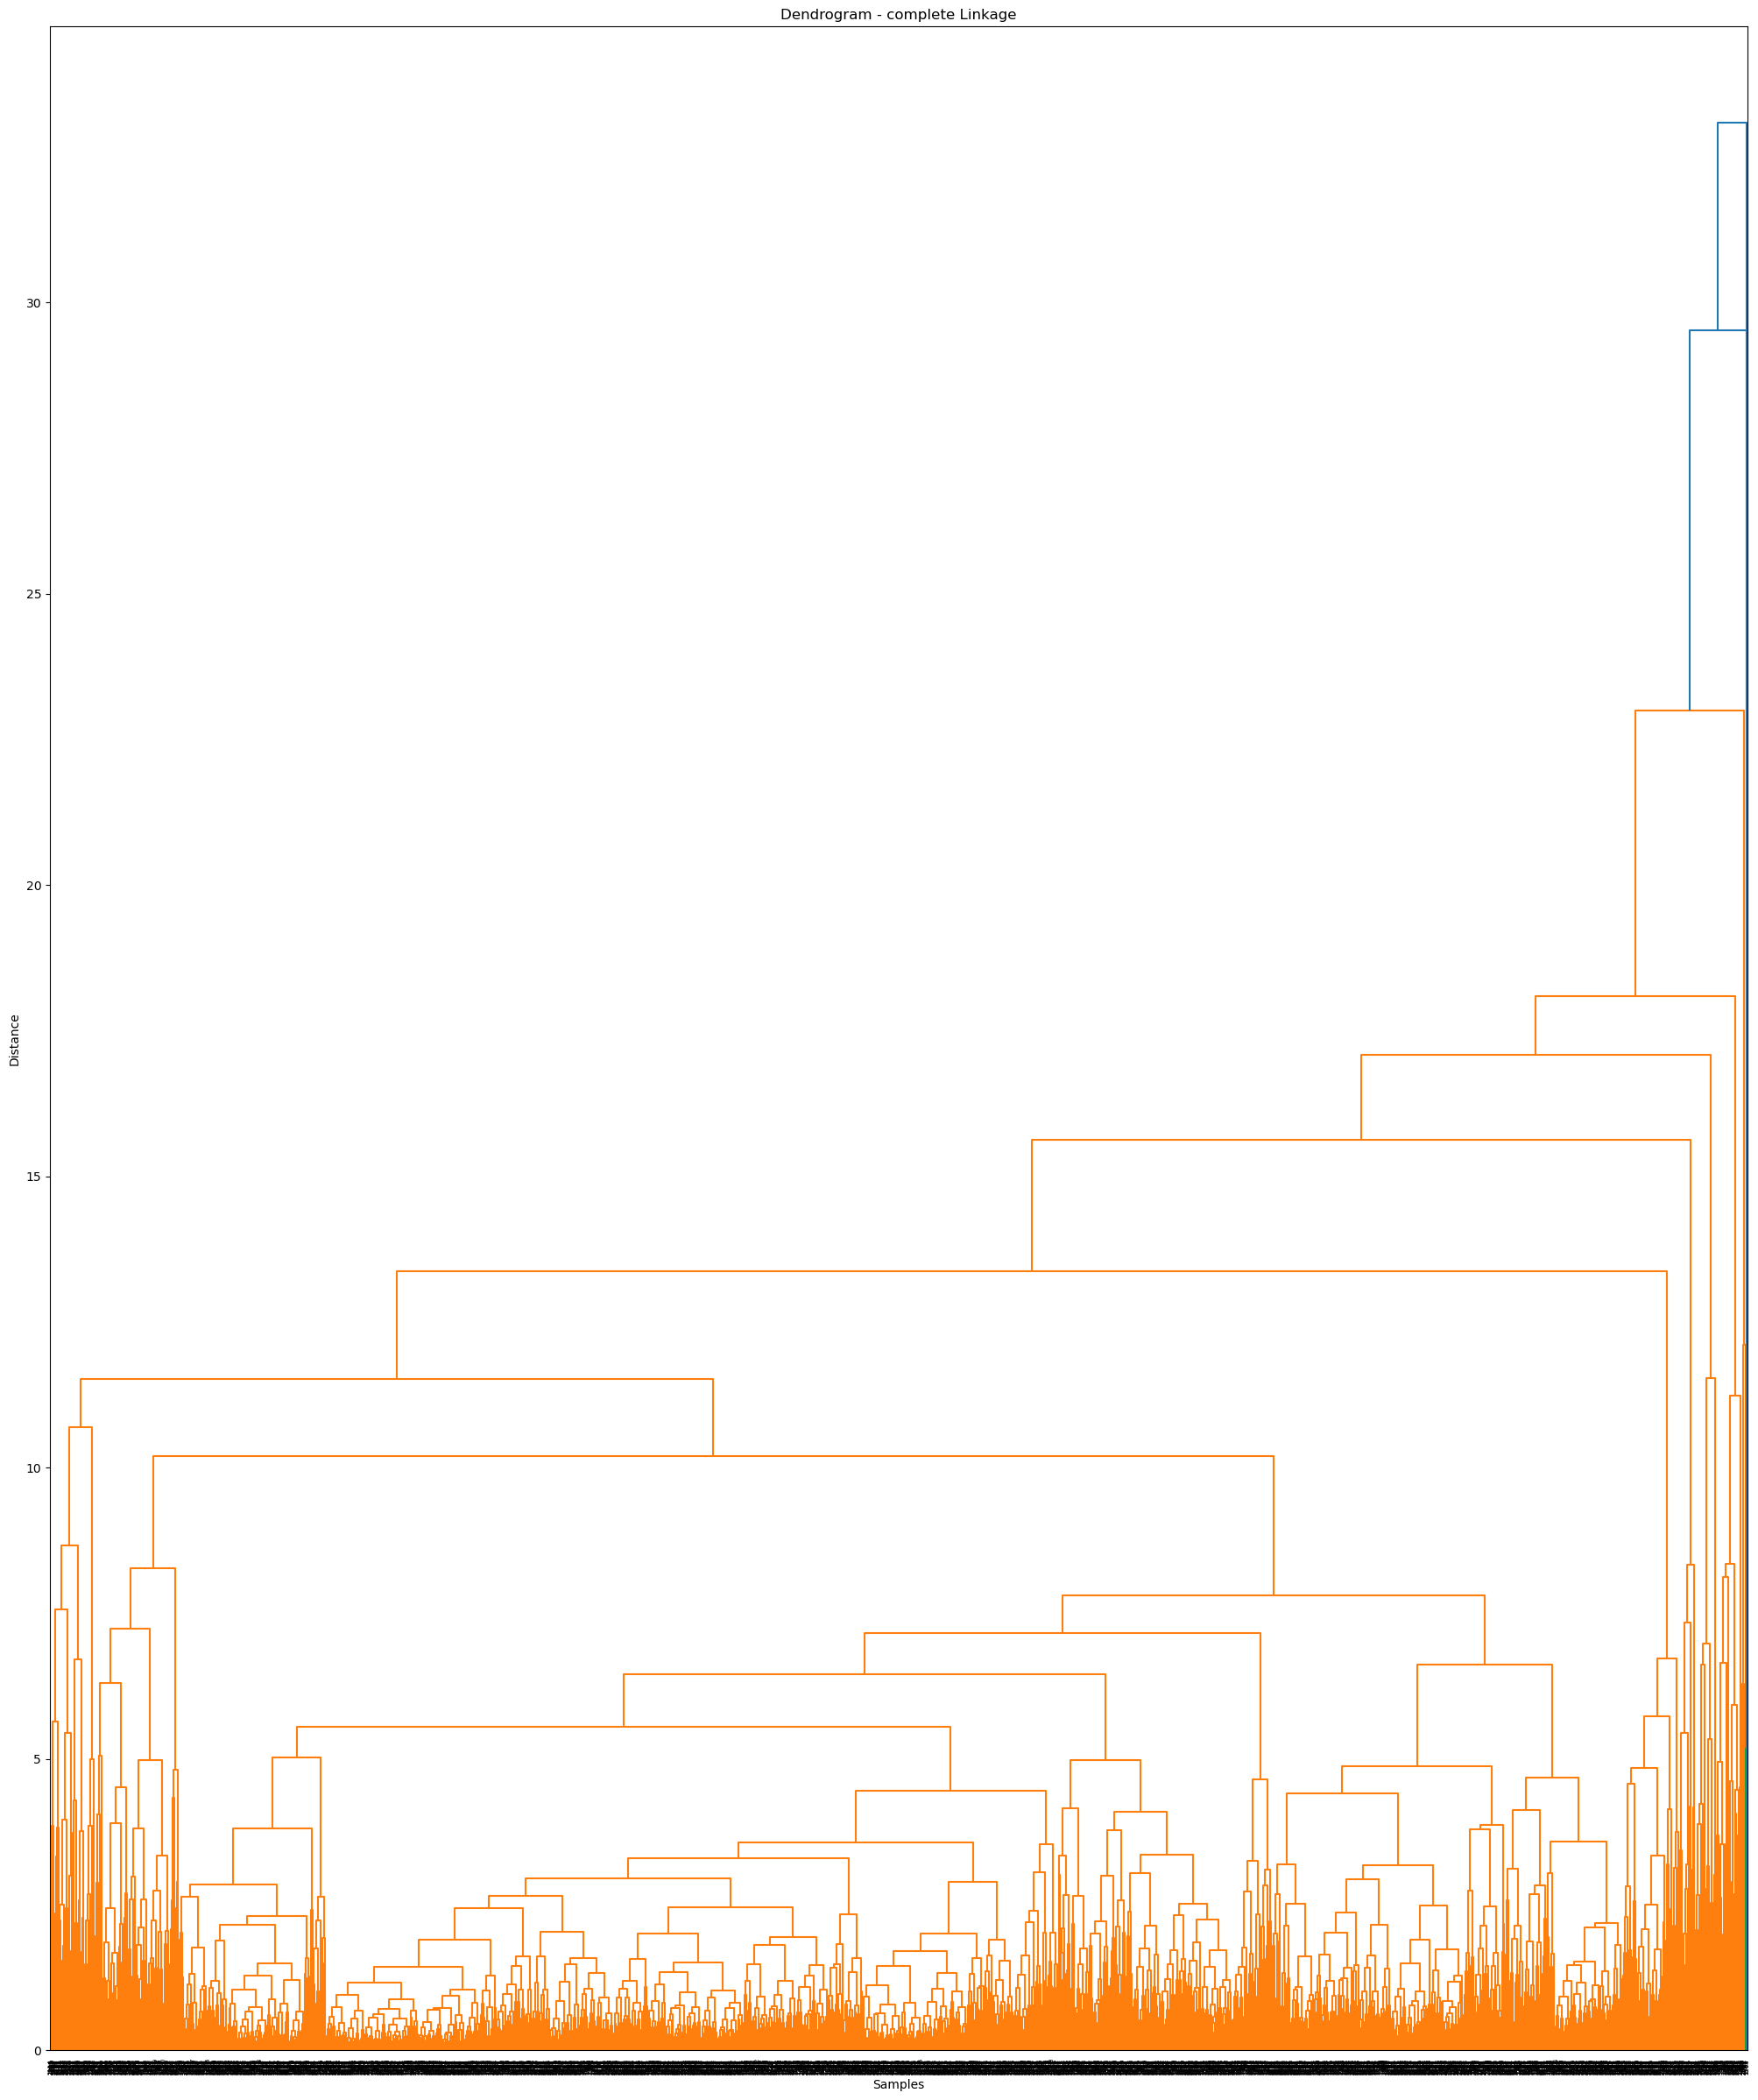

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# Perform hierarchical clustering without specifying the number of clusters
linked = linkage(df_pca, method='complete')

# Plot the dendrogram
plt.figure(figsize=(25, 30))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram - complete Linkage')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Silhouette Scores for varies Number of clusters- Complete Linkage

In [142]:
for i in range(2,14):    
    hierarchical_cluster = AgglomerativeClustering(n_clusters=i,linkage='complete') 
    cluster_labels = hierarchical_cluster.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print(f'Silhouette Score for {i} clusters is', silhouette_avg)

Silhouette Score for 2 clusters is 0.8510498514269373
Silhouette Score for 3 clusters is 0.8266547463886117
Silhouette Score for 4 clusters is 0.6944353966870981
Silhouette Score for 5 clusters is 0.593398860773667
Silhouette Score for 6 clusters is 0.49299527887112327
Silhouette Score for 7 clusters is 0.49125709558175573
Silhouette Score for 8 clusters is 0.42909573306003296
Silhouette Score for 9 clusters is 0.4276295841904557
Silhouette Score for 10 clusters is 0.40600541519376315
Silhouette Score for 11 clusters is 0.39856479541686407
Silhouette Score for 12 clusters is 0.39671698589209015
Silhouette Score for 13 clusters is 0.37946736899291234


# Dendogram -- Average Linkage

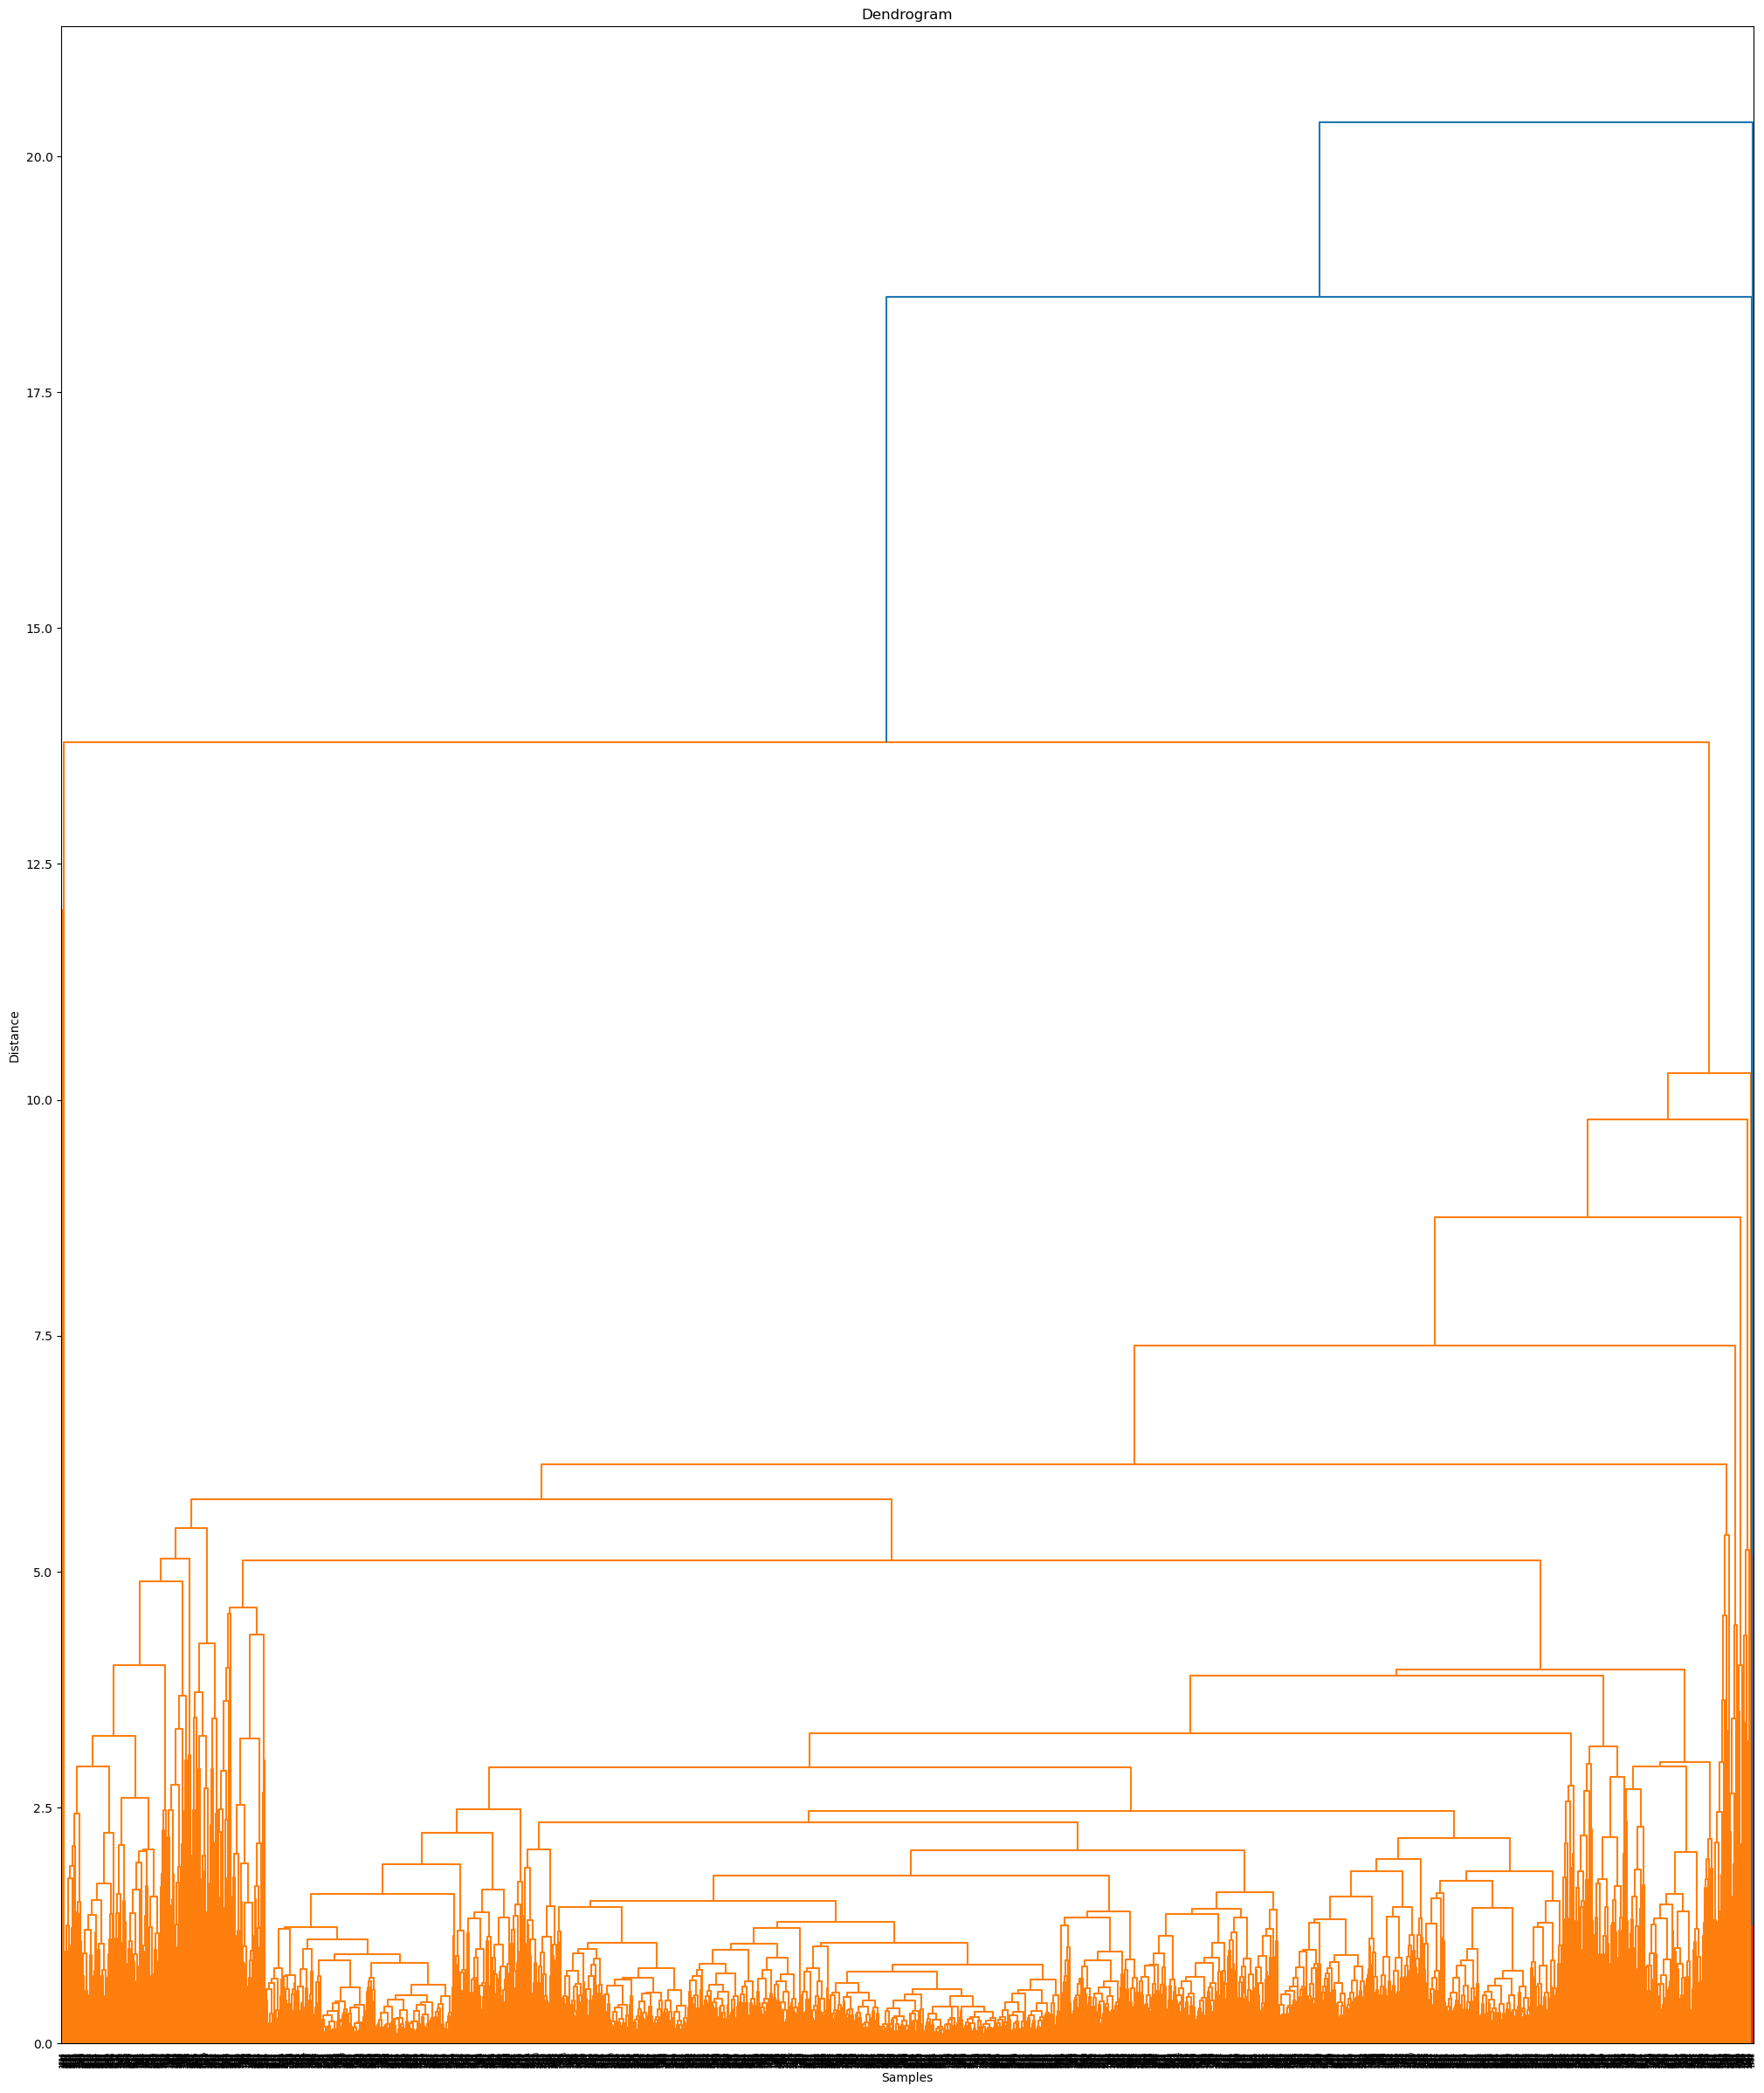

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# Perform hierarchical clustering without specifying the number of clusters
linked = linkage(df_pca, method='average')

# Plot the dendrogram
plt.figure(figsize=(25, 30))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Silhouette Scores for varies Number of clusters- Average Linkage

In [144]:
for i in range(2,14):    
    hierarchical_cluster = AgglomerativeClustering(n_clusters=i,linkage='average') 
    cluster_labels = hierarchical_cluster.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print(f'Silhouette Score for {i} clusters is', silhouette_avg)

Silhouette Score for 2 clusters is 0.8276023861734735
Silhouette Score for 3 clusters is 0.8088027689161084
Silhouette Score for 4 clusters is 0.7472493285131828
Silhouette Score for 5 clusters is 0.7134139684524654
Silhouette Score for 6 clusters is 0.6599103743911714
Silhouette Score for 7 clusters is 0.6244070322620726
Silhouette Score for 8 clusters is 0.5822962276236557
Silhouette Score for 9 clusters is 0.5139136978962093
Silhouette Score for 10 clusters is 0.42763182132954
Silhouette Score for 11 clusters is 0.44108091614446426
Silhouette Score for 12 clusters is 0.4336824446129836
Silhouette Score for 13 clusters is 0.4215487810134458


# Dendogram -- Ward Linkage

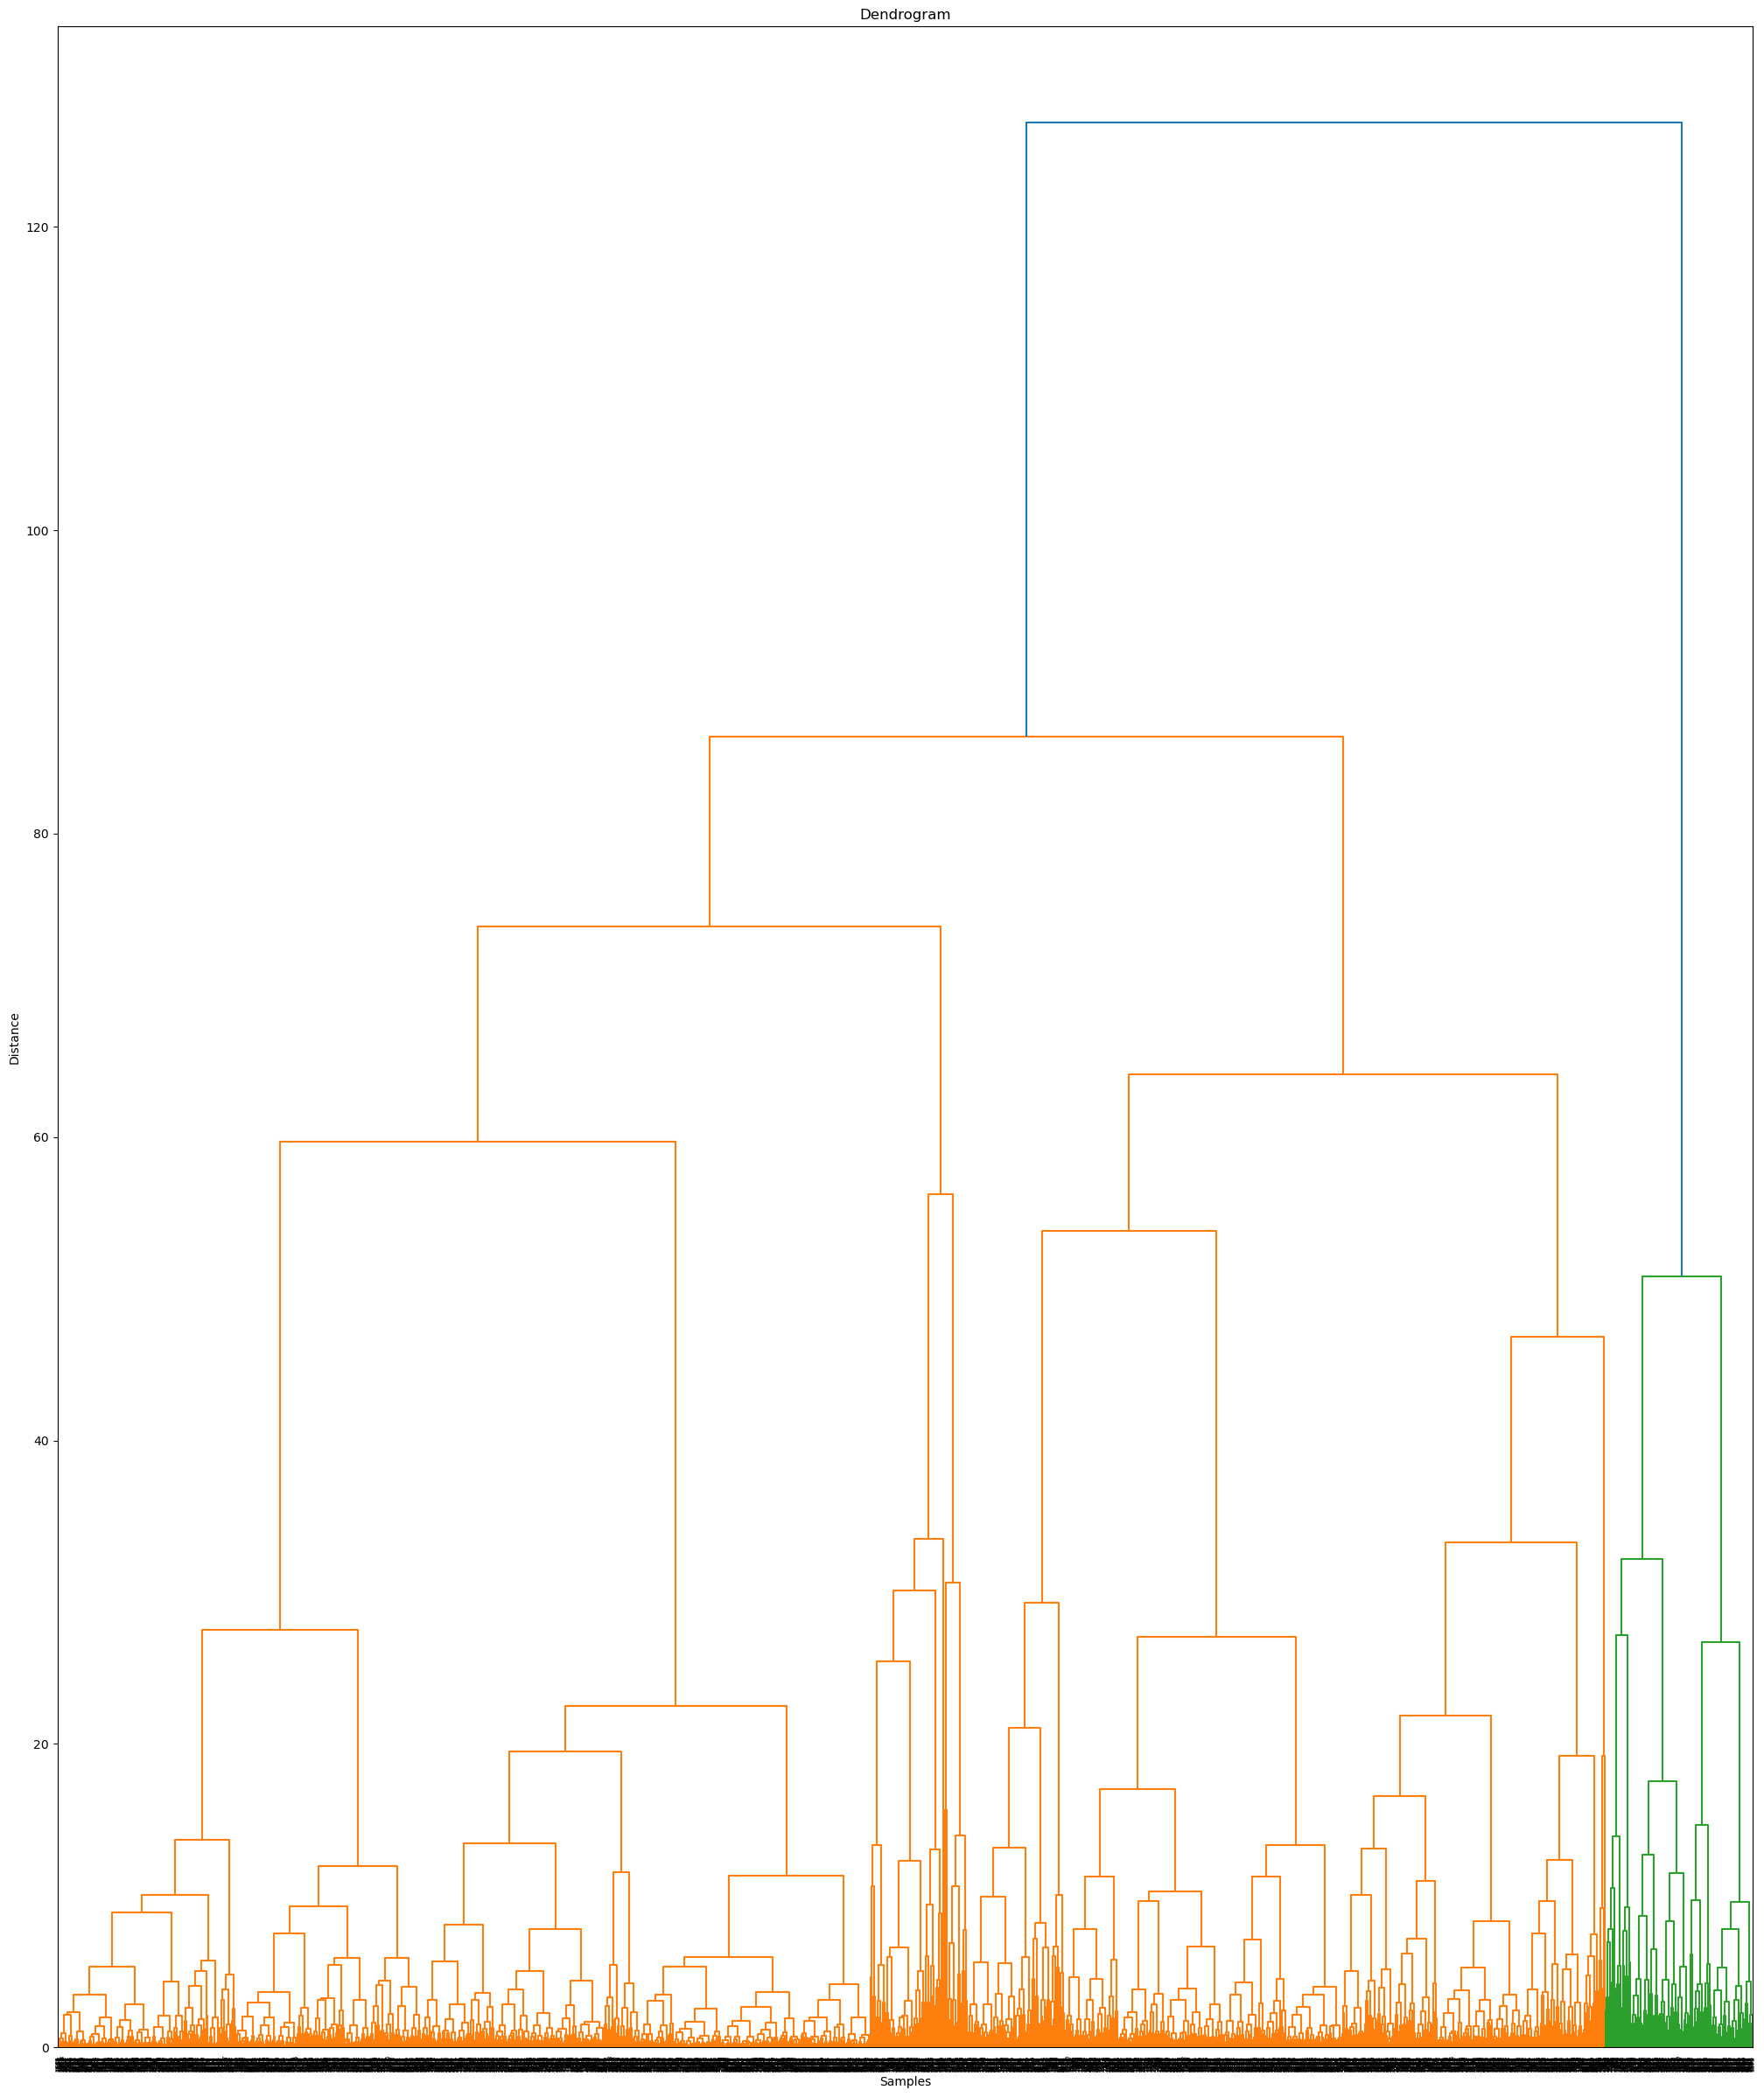

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# Perform hierarchical clustering without specifying the number of clusters
linked = linkage(df_pca, method='ward')

# Plot the dendrogram
plt.figure(figsize=(25, 30))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Silhouette Scores for varies Number of clusters- Ward Linkage

In [146]:
for i in range(2,14):    
    hierarchical_cluster = AgglomerativeClustering(n_clusters=i,linkage='ward') 
    cluster_labels = hierarchical_cluster.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print(f'Silhouette Score for` {i} clusters is', silhouette_avg)

Silhouette Score for` 2 clusters is 0.4787027772130799
Silhouette Score for` 3 clusters is 0.2126509865066949
Silhouette Score for` 4 clusters is 0.22893473790464838
Silhouette Score for` 5 clusters is 0.2414766621563993
Silhouette Score for` 6 clusters is 0.20036565579712473
Silhouette Score for` 7 clusters is 0.21103317689648177
Silhouette Score for` 8 clusters is 0.2247318750518433
Silhouette Score for` 9 clusters is 0.23421914831585533
Silhouette Score for` 10 clusters is 0.24368557604404248
Silhouette Score for` 11 clusters is 0.24537660822227567
Silhouette Score for` 12 clusters is 0.25611080680913983
Silhouette Score for` 13 clusters is 0.25623615503350594


# Silhouette Score Visualization for Ward Linkage

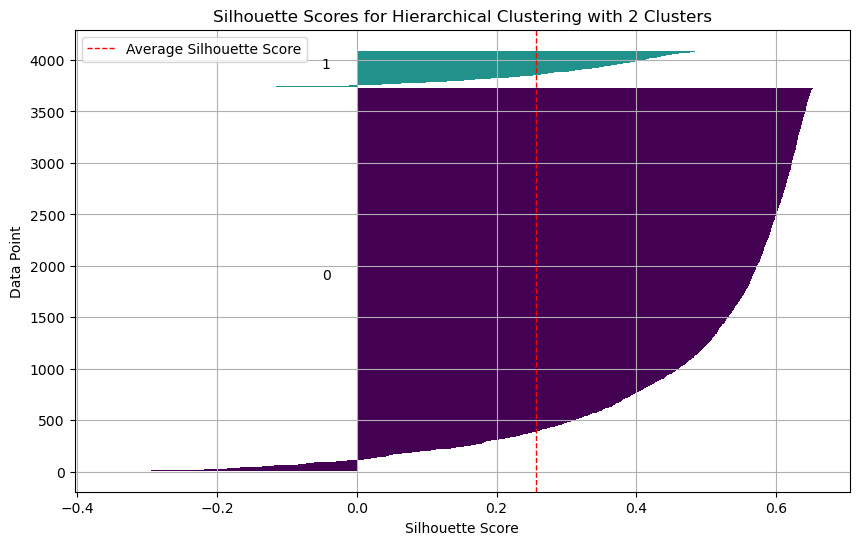

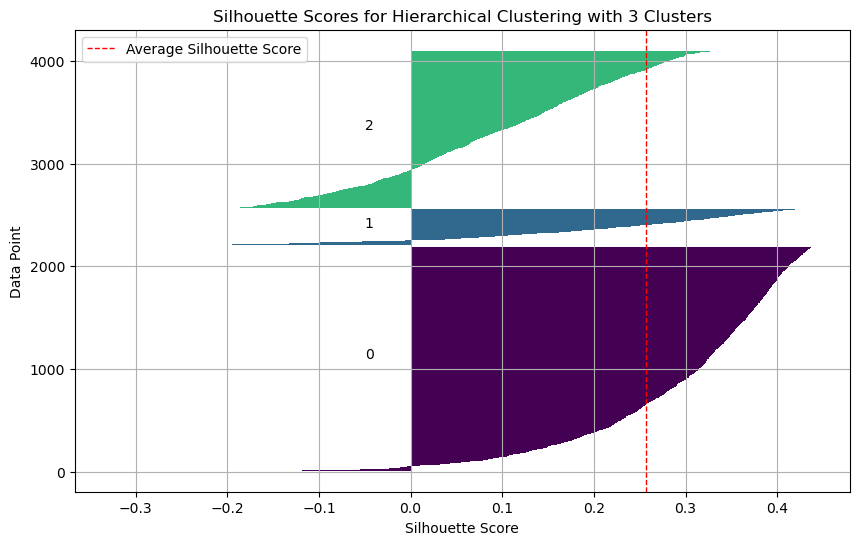

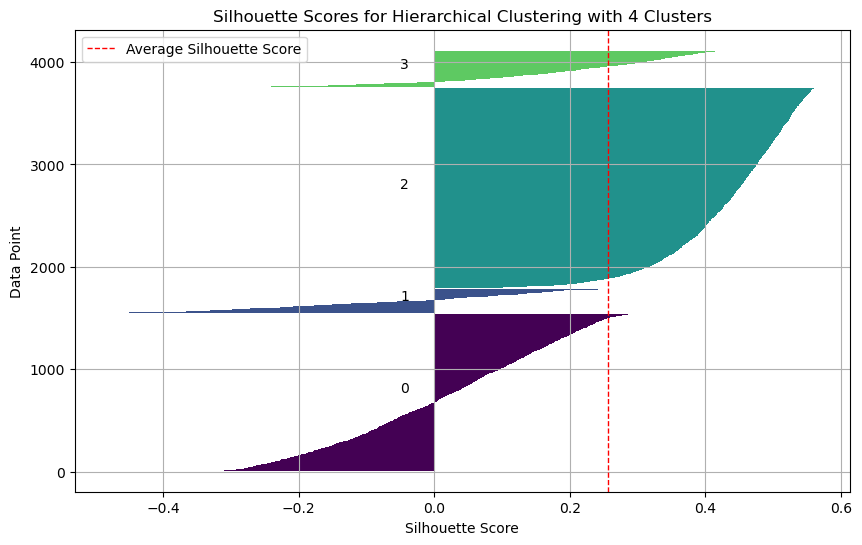

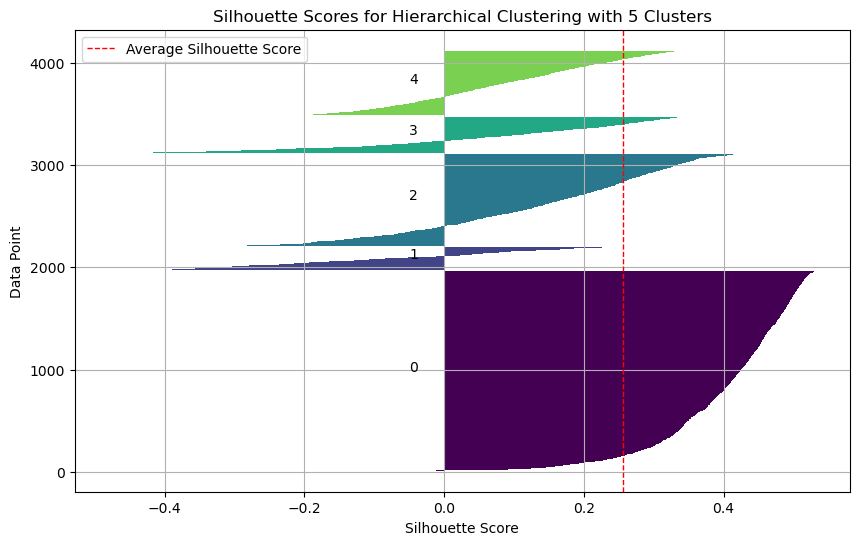

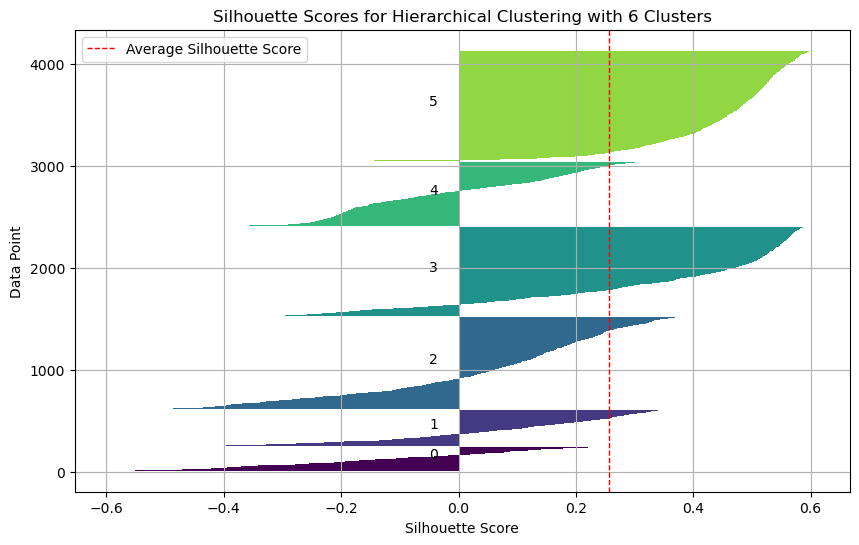

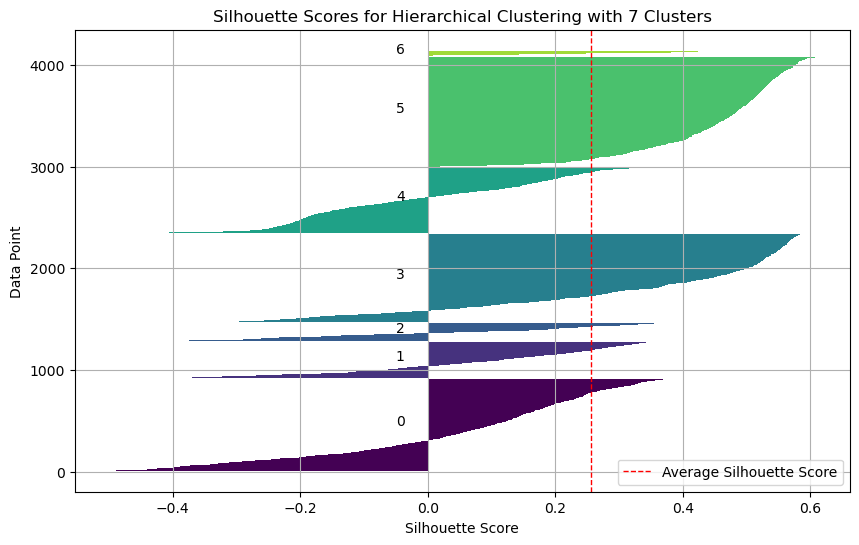

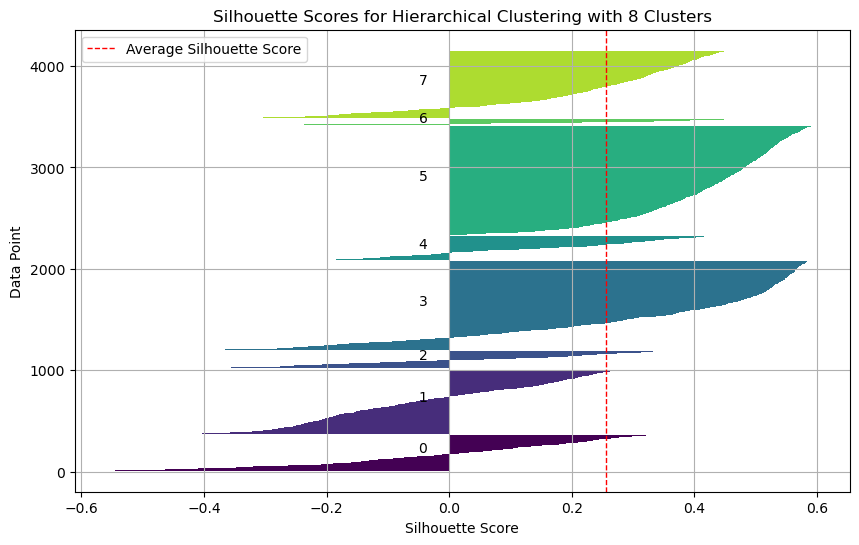

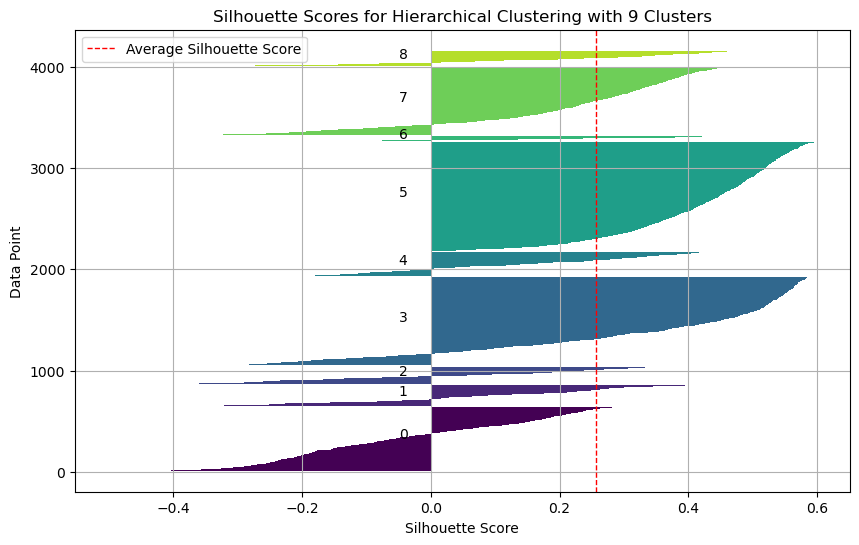

In [147]:
from sklearn.metrics import silhouette_samples

# Perform hierarchical clustering with a variable number of clusters (2 to 15)
for n_clusters in range(2,11 ):
    hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters,linkage ='ward')
    cluster_labels = hierarchical_cluster.fit_predict(df_pca)
    
    # Calculate silhouette scores for each data point
    silhouette_values = silhouette_samples(df_pca, cluster_labels)
    
    plt.figure(figsize=(10, 6))
    y_lower = 10
    for i in range(n_clusters):
        # Extract silhouette scores for the current cluster
        cluster_silhouette_values = silhouette_values[cluster_labels == i]
        cluster_silhouette_values.sort()
        
        # Calculate positions for the silhouette plot
        y_upper = y_lower + len(cluster_silhouette_values)
        color = plt.cm.viridis(float(i) / n_clusters)  # Adjust color for each cluster
        plt.barh(range(y_lower, y_upper), cluster_silhouette_values, height=1.0, color=color)
        
        # Add cluster label at the middle of the silhouette plot
        plt.text(-0.05, (y_lower + y_upper) / 2, str(i))
        
        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10
    
    plt.xlabel('Silhouette Score')
    plt.ylabel('Data Point')
    plt.title(f'Silhouette Scores for Hierarchical Clustering with {n_clusters} Clusters')
    plt.axvline(x=silhouette_avg, color='red', linestyle='--', linewidth=1, label='Average Silhouette Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


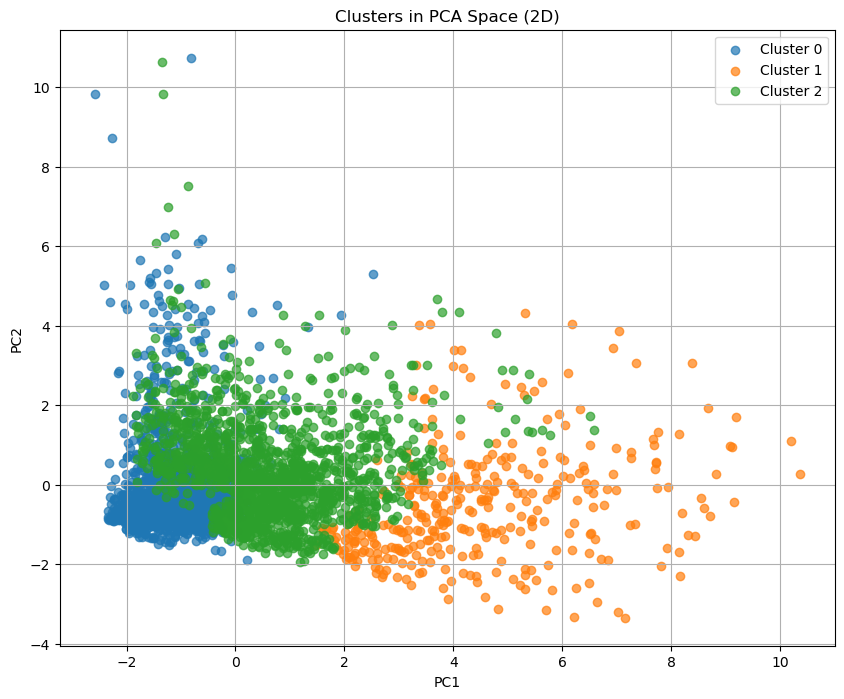

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


hierarchical_cluster = AgglomerativeClustering(n_clusters=3,linkage ='ward') 
cluster_labels = hierarchical_cluster.fit_predict(df_pca)


# kmeans_8 = KMeans(n_clusters=8, random_state=42)
# kmeans_8.fit(df_scaled)
# cluster_labels_8 = kmeans_8.labels_

# Select two principal components with the highest explained variance
pc1_index = 0  # Index of the first principal component
pc2_index = 1  # Index of the second principal component

# Plot the clusters in 2D
plt.figure(figsize=(10, 8))

# Iterate over unique clusters
for cluster in np.unique(cluster_labels):
    # Use boolean indexing with iloc to select rows based on cluster labels
    cluster_points = df_pca.iloc[cluster_labels== cluster]

    # Plot points for the current cluster
    plt.scatter(cluster_points.iloc[:, pc1_index], cluster_points.iloc[:, pc2_index],
                label=f'Cluster {cluster}', alpha=0.7)

plt.xlabel(f'PC{pc1_index + 1}')
plt.ylabel(f'PC{pc2_index + 1}')
plt.title('Clusters in PCA Space (2D)')
plt.legend()
plt.grid(True)
plt.show()

In [149]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Iterate over unique clusters
for cluster in np.unique(cluster_labels):
    # Use boolean indexing with iloc to select rows based on cluster labels
    cluster_points = df_pca.iloc[cluster_labels == cluster]

    # Plot points for the current cluster
    ax.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], cluster_points.iloc[:, 2],
               label=f'Cluster {cluster}', alpha=0.7)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.title('Clusters in PCA Space')
plt.show()

# Evaluation metrics for the model built

In [150]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)

# Calculate Davies-Bouldin Index
davies_bouldin_idx = davies_bouldin_score(df_scaled, cluster_labels)

# Calculate Calinski-Harabasz Index
calinski_harabasz_idx = calinski_harabasz_score(df_scaled, cluster_labels)

print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin_idx)
print("Calinski-Harabasz Index:", calinski_harabasz_idx)

Silhouette Score: 0.2095797473263174
Davies-Bouldin Index: 1.6750473688319432
Calinski-Harabasz Index: 964.8771471075498


# 3.  DBSCAN Algorithm

In [151]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Initialize a list to store average silhouette scores for each number of clusters
avg_silhouette_scores = []

# Perform DBSCAN clustering with a variable number of clusters (minimum_samples and eps)
for min_samples in range(1,11):
    for eps in [0.9,0.8,0.95]:  # Adjust eps values as needed
        dbscan_cluster = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan_cluster.fit_predict(df_pca)
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(df_pca, cluster_labels)
        avg_silhouette_scores.append((min_samples, eps, silhouette_avg))

# Print average silhouette scores for each combination of min_samples and eps
for min_samples, eps, silhouette_avg in avg_silhouette_scores:
    print(f'For min_samples={min_samples} and eps={eps}, average silhouette score: {silhouette_avg}')


For min_samples=1 and eps=0.9, average silhouette score: -0.14024370069281133
For min_samples=1 and eps=0.8, average silhouette score: -0.1404924773122555
For min_samples=1 and eps=0.95, average silhouette score: -0.10152909461708459
For min_samples=2 and eps=0.9, average silhouette score: 0.003532407680524492
For min_samples=2 and eps=0.8, average silhouette score: -0.06909507560554692
For min_samples=2 and eps=0.95, average silhouette score: -0.07136652728895403
For min_samples=3 and eps=0.9, average silhouette score: 0.12084805703833225
For min_samples=3 and eps=0.8, average silhouette score: -0.027628772084197787
For min_samples=3 and eps=0.95, average silhouette score: 0.1261937895859041
For min_samples=4 and eps=0.9, average silhouette score: 0.1676219293300047
For min_samples=4 and eps=0.8, average silhouette score: -0.044181959336898745
For min_samples=4 and eps=0.95, average silhouette score: 0.29998095482136217
For min_samples=5 and eps=0.9, average silhouette score: 0.168811

In [152]:
from sklearn.cluster import DBSCAN

# Define DBSCAN with chosen parameters
dbscan_cluster = DBSCAN(eps=0.9, min_samples=10)

# Perform clustering
cluster_labels = dbscan_cluster.fit_predict(df_pca)

# Count the number of clusters formed (excluding noise, labeled as -1)
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

print("Number of clusters formed:", num_clusters)


Number of clusters formed: 3


In [153]:
import numpy as np

# Count the number of points in each cluster
unique_labels, label_counts = np.unique(cluster_labels, return_counts=True)

# Extract the number of noise points (points labeled as -1)
num_noise_points = label_counts[np.where(unique_labels == -1)]

# Remove noise points from the count
num_clusters = len(unique_labels) - 1 if -1 in unique_labels else len(unique_labels)

# Display the number of points per cluster
print("Number of points per cluster:")
for label, count in zip(unique_labels, label_counts):
    if label != -1:
        print(f"Cluster {label}: {count} points")

# Display the number of noise points
print("Number of noise points:", num_noise_points)


Number of points per cluster:
Cluster 0: 3453 points
Cluster 1: 66 points
Cluster 2: 28 points
Number of noise points: [524]


# Cluster Visualization

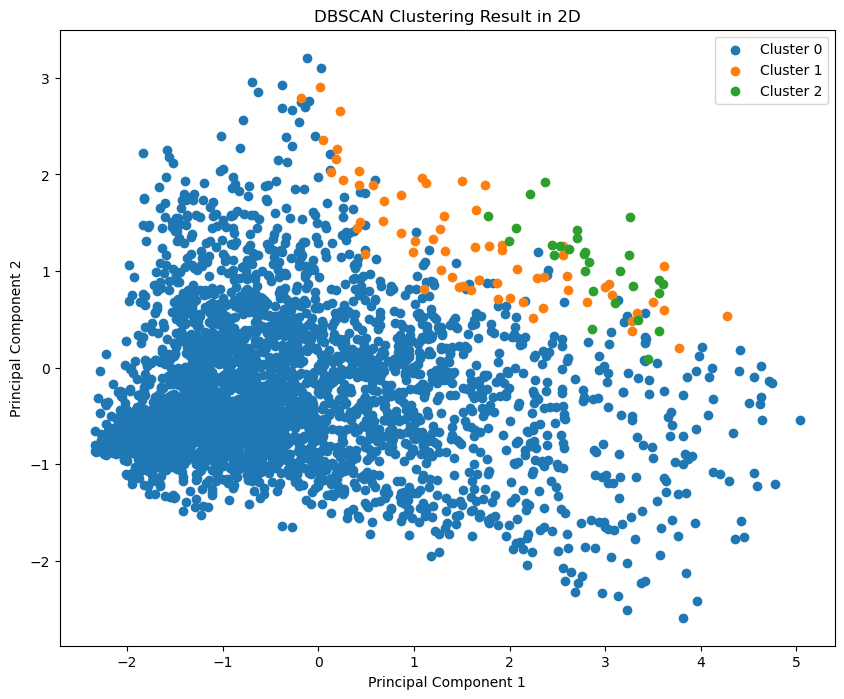

In [154]:
# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot clusters in 3D
for label in np.unique(cluster_labels):
    if label == -1:  # Skip noise points
        continue
    cluster_points = df_pca[cluster_labels == label]
    ax.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], cluster_points.iloc[:, 2], label=f'Cluster {label}')

# Plot noise points separately
#noise_points = df_pca[cluster_labels == -1]
#ax.scatter(noise_points.iloc[:, 0], noise_points.iloc[:, 1], noise_points.iloc[:, 2], c='black', marker='x', label='Noise')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('DBSCAN Clustering Result in 3D')
ax.legend()
plt.show()

# 2D Plot
plt.figure(figsize=(10, 8))

# Plot clusters in 2D
for label in np.unique(cluster_labels):
    if label == -1:  # Skip noise points
        continue
    cluster_points = df_pca[cluster_labels == label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {label}')

# Plot noise points separately
#plt.scatter(noise_points.iloc[:, 0], noise_points.iloc[:, 1], c='black', marker='x', label='Noise')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering Result in 2D')
plt.legend()
plt.show()


# Metrics

In [155]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)

# Calculate Davies-Bouldin Index
davies_bouldin_idx = davies_bouldin_score(df_scaled, cluster_labels)

# Calculate Calinski-Harabasz Index
calinski_harabasz_idx = calinski_harabasz_score(df_scaled, cluster_labels)

print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin_idx)
print("Calinski-Harabasz Index:", calinski_harabasz_idx)

Silhouette Score: 0.2157906242919909
Davies-Bouldin Index: 2.810782989210679
Calinski-Harabasz Index: 249.77190281558507


# 4.  Mean Shift Clustering Algorithm

# Determining The optimum Value for bandwidth parameter.

In [156]:
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score

# Initialize a list to store average silhouette scores for each number of clusters
avg_silhouette_scores = []

# Perform Mean Shift clustering with a variable number of bandwidths
bandwidths = [ 1.0, 1.25, 1.6, 2.0,2.5,3,3.5]  # Adjust bandwidth values as needed
for bandwidth in bandwidths:
    mean_shift_cluster = MeanShift(bandwidth=bandwidth)
    cluster_labels = mean_shift_cluster.fit_predict(df_pca)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    avg_silhouette_scores.append((bandwidth, silhouette_avg))

# Print average silhouette scores for each bandwidth
for bandwidth, silhouette_avg in avg_silhouette_scores:
    print(f'For bandwidth={bandwidth}, average silhouette score: {silhouette_avg}')


For bandwidth=1.0, average silhouette score: 0.21488206460789155
For bandwidth=1.25, average silhouette score: 0.22962146405232642
For bandwidth=1.6, average silhouette score: 0.20275289084025186
For bandwidth=2.0, average silhouette score: 0.30316515863095467
For bandwidth=2.5, average silhouette score: 0.4283011371010475
For bandwidth=3, average silhouette score: 0.5198149393881637
For bandwidth=3.5, average silhouette score: 0.6194530343162112


In [157]:
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score
from collections import Counter

# Perform Mean Shift clustering with bandwidth=3.5
mean_shift_cluster = MeanShift(bandwidth= 3.5)
cluster_labels = mean_shift_cluster.fit_predict(df_pca)

# Get the number of clusters
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)  # Exclude noise points

# Count the number of points per cluster
points_per_cluster = Counter(cluster_labels)

# Calculate silhouette score
silhouette_avg = silhouette_score(df_pca, cluster_labels)

# Print results
print("Number of clusters:", num_clusters)
print("Number of points per cluster:", points_per_cluster)
print("Silhouette score:", silhouette_avg)


Number of clusters: 6
Number of points per cluster: Counter({0: 4036, 1: 24, 2: 5, 4: 4, 5: 1, 3: 1})
Silhouette score: 0.6194530343162112


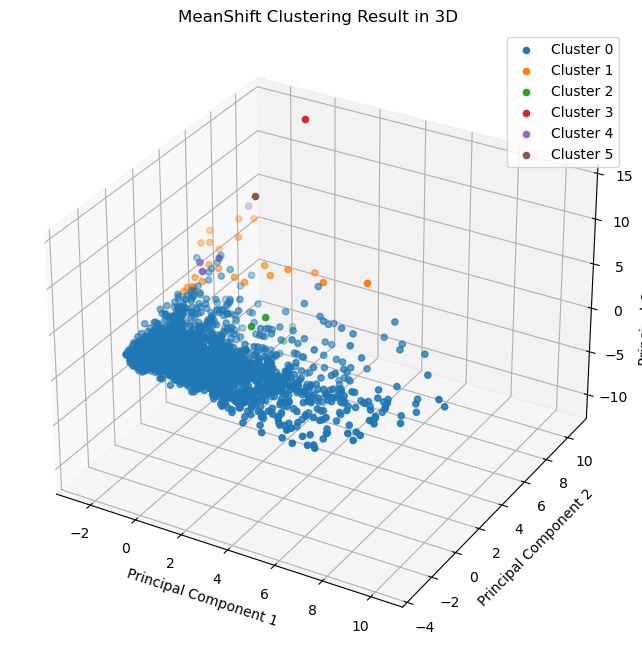

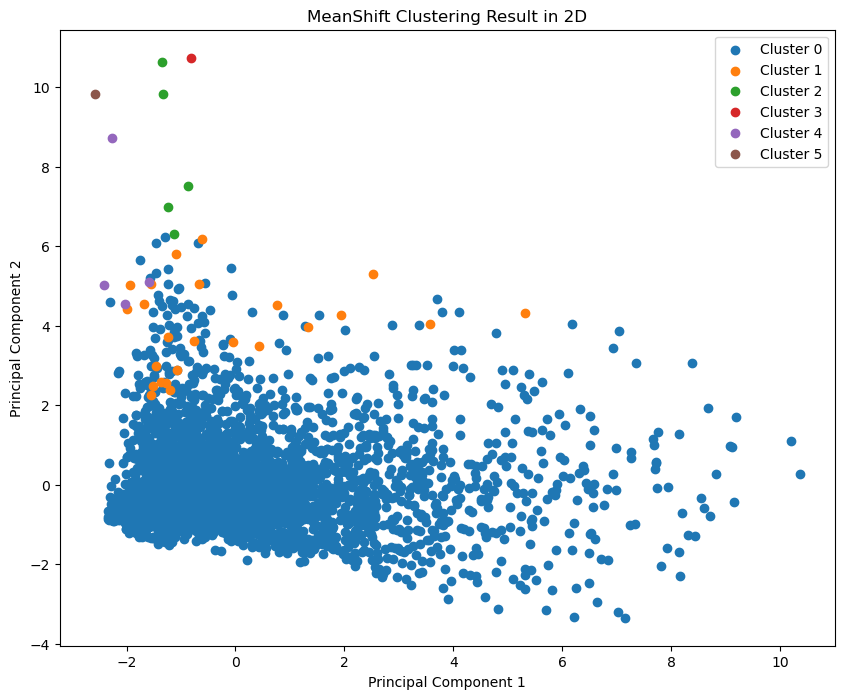

In [158]:
# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot clusters in 3D
for label in np.unique(cluster_labels):
    if label == -1:  # Skip noise points
        continue
    cluster_points = df_pca[cluster_labels == label]
    ax.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], cluster_points.iloc[:, 2], label=f'Cluster {label}')

# Plot noise points separately
#noise_points = df_pca[cluster_labels == -1]
#ax.scatter(noise_points.iloc[:, 0], noise_points.iloc[:, 1], noise_points.iloc[:, 2], c='black', marker='x', label='Noise')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('MeanShift Clustering Result in 3D')
ax.legend()
plt.show()

# 2D Plot
plt.figure(figsize=(10, 8))

# Plot clusters in 2D
for label in np.unique(cluster_labels):
    if label == -1:  # Skip noise points
        continue
    cluster_points = df_pca[cluster_labels == label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {label}')

# Plot noise points separately
#plt.scatter(noise_points.iloc[:, 0], noise_points.iloc[:, 1], c='black', marker='x', label='Noise')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MeanShift Clustering Result in 2D')
plt.legend()
plt.show()


# Metrics

In [159]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)

# Calculate Davies-Bouldin Index
davies_bouldin_idx = davies_bouldin_score(df_scaled, cluster_labels)

# Calculate Calinski-Harabasz Index
calinski_harabasz_idx = calinski_harabasz_score(df_scaled, cluster_labels)

print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin_idx)
print("Calinski-Harabasz Index:", calinski_harabasz_idx)

Silhouette Score: 0.6189067085258669
Davies-Bouldin Index: 0.5086523358365534
Calinski-Harabasz Index: 103.34434652368806


# 5. Gaussian Mixture Model

In [160]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Initialize a list to store silhouette scores for each number of clusters
silhouette_scores_gmm = []

# Iterate over the desired number of clusters
for n_clusters in range(2, 14):
    # Initialize GMM with the current number of components
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    
    # Fit the model to the data
    gmm.fit(df_pca)
    
    # Predict cluster labels
    cluster_labels_gmm = gmm.predict(df_pca)
    
    # Calculate silhouette score
    silhouette_avg_gmm = silhouette_score(df_pca, cluster_labels_gmm)
    
    # Append silhouette score to the list
    silhouette_scores_gmm.append((n_clusters, silhouette_avg_gmm))

# Print silhouette scores for each number of clusters
for n_clusters, silhouette_avg_gmm in silhouette_scores_gmm:
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg_gmm}")

    

Number of clusters: 2, Silhouette Score: 0.25620268504777083
Number of clusters: 3, Silhouette Score: 0.11944678852245773
Number of clusters: 4, Silhouette Score: 0.0909724752452474
Number of clusters: 5, Silhouette Score: 0.13140629204374346
Number of clusters: 6, Silhouette Score: 0.1291456810003854
Number of clusters: 7, Silhouette Score: 0.12113925188112938
Number of clusters: 8, Silhouette Score: 0.12286857263279657
Number of clusters: 9, Silhouette Score: 0.10141397055766346
Number of clusters: 10, Silhouette Score: 0.12017149839747422
Number of clusters: 11, Silhouette Score: 0.1091135671675979
Number of clusters: 12, Silhouette Score: 0.09791736367468681
Number of clusters: 13, Silhouette Score: 0.08304464560490403


In [161]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Initialize GMM with desired number of components
gmm = GaussianMixture(n_components=2, random_state=42)

# Fit the model to the data
gmm.fit(df_pca)

# Predict cluster labels
cluster_labels= gmm.predict(df_pca)

# Calculate silhouette score
silhouette_avg_gmm = silhouette_score(df_pca, cluster_labels_gmm)
print("Silhouette Score for GMM:", silhouette_avg_gmm)


Silhouette Score for GMM: 0.08304464560490403


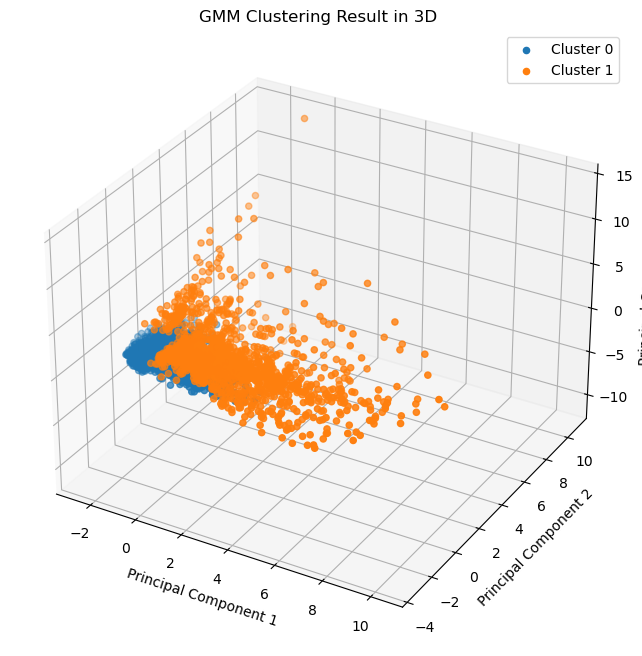

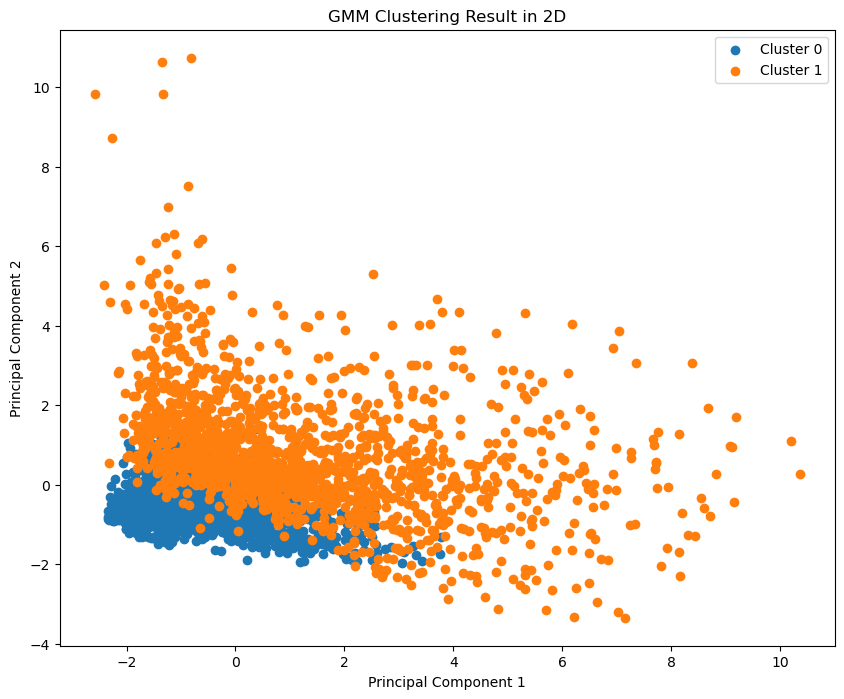

In [162]:
# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot clusters in 3D
for label in np.unique(cluster_labels):
    if label == -1:  # Skip noise points
        continue
    cluster_points = df_pca[cluster_labels == label]
    ax.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], cluster_points.iloc[:, 2], label=f'Cluster {label}')


ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('GMM Clustering Result in 3D')
ax.legend()
plt.show()

# 2D Plot
plt.figure(figsize=(10, 8))

# Plot clusters in 2D
for label in np.unique(cluster_labels):
    if label == -1:  # Skip noise points
        continue
    cluster_points = df_pca[cluster_labels == label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {label}')

# Plot noise points separately
#plt.scatter(noise_points.iloc[:, 0], noise_points.iloc[:, 1], c='black', marker='x', label='Noise')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('GMM Clustering Result in 2D')
plt.legend()
plt.show()


# Evaluation Metrics

In [163]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)

# Calculate Davies-Bouldin Index
davies_bouldin_idx = davies_bouldin_score(df_scaled, cluster_labels)

# Calculate Calinski-Harabasz Index
calinski_harabasz_idx = calinski_harabasz_score(df_scaled, cluster_labels)

print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin_idx)
print("Calinski-Harabasz Index:", calinski_harabasz_idx)

Silhouette Score: 0.2545824697212649
Davies-Bouldin Index: 1.908163159638888
Calinski-Harabasz Index: 781.4219930224235


# 6. spectral Clustering

In [164]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# Initialize a list to store silhouette scores for each number of clusters
silhouette_scores_spectral = []

# Iterate over the desired number of clusters
for n_clusters in range(2, 8):
    # Initialize SpectralClustering with the current number of clusters
    spectral_cluster = SpectralClustering(n_clusters=n_clusters, random_state=402)
    
    # Fit the model to the data
    cluster_labels_spectral = spectral_cluster.fit_predict(df_pca)
    
    # Calculate silhouette score
    silhouette_avg_spectral = silhouette_score(df_pca, cluster_labels_spectral)
    
    # Append silhouette score to the list
    silhouette_scores_spectral.append((n_clusters, silhouette_avg_spectral))

# Print silhouette scores for each number of clusters
for n_clusters, silhouette_avg_spectral in silhouette_scores_spectral:
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg_spectral}")


Number of clusters: 2, Silhouette Score: 0.8276023861734735
Number of clusters: 3, Silhouette Score: 0.8266547463886117
Number of clusters: 4, Silhouette Score: 0.7134232581319961
Number of clusters: 5, Silhouette Score: 0.6650765115236442
Number of clusters: 6, Silhouette Score: 0.6664383185769697
Number of clusters: 7, Silhouette Score: 0.6335133965602469


In [165]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# Initialize SpectralClustering with 3 clusters
spectral_cluster = SpectralClustering(n_clusters=4, random_state=402)

# Fit the model to the data
cluster_labels = spectral_cluster.fit_predict(df_pca)

# Calculate silhouette score
silhouette_avg_spectral = silhouette_score(df_pca, cluster_labels_spectral)

# Print silhouette score
print(f"Number of clusters: 4, Silhouette Score: {silhouette_avg_spectral}")


Number of clusters: 4, Silhouette Score: 0.6335133965602469


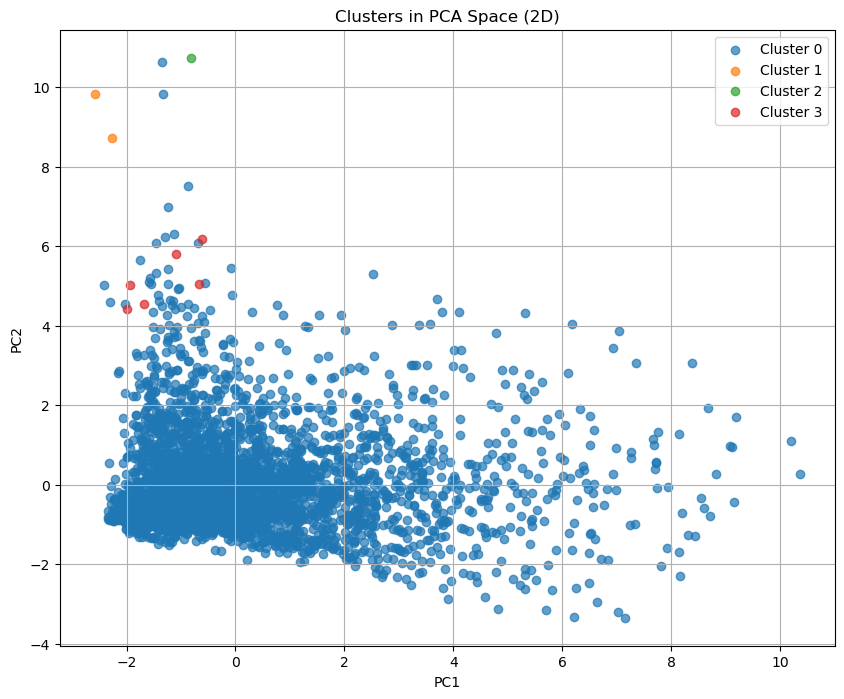

In [166]:


# Select two principal components with the highest explained variance
pc1_index = 0  # Index of the first principal component
pc2_index = 1  # Index of the second principal component

# Plot the clusters in 2D
plt.figure(figsize=(10, 8))

# Iterate over unique clusters
for cluster in np.unique(cluster_labels):
    # Use boolean indexing with iloc to select rows based on cluster labels
    cluster_points = df_pca.iloc[cluster_labels== cluster]

    # Plot points for the current cluster
    plt.scatter(cluster_points.iloc[:, pc1_index], cluster_points.iloc[:, pc2_index],
                label=f'Cluster {cluster}', alpha=0.7)

plt.xlabel(f'PC{pc1_index + 1}')
plt.ylabel(f'PC{pc2_index + 1}')
plt.title('Clusters in PCA Space (2D)')
plt.legend()
plt.grid(True)
plt.show()

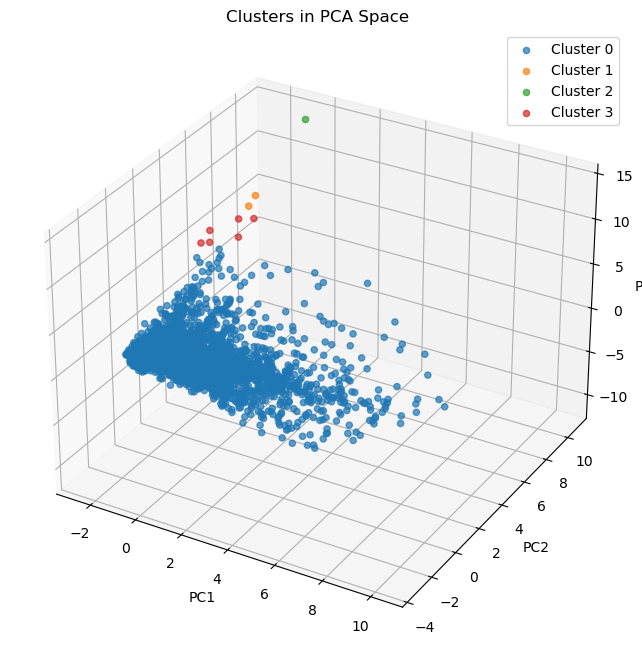

In [167]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Iterate over unique clusters
for cluster in np.unique(cluster_labels):
    # Use boolean indexing with iloc to select rows based on cluster labels
    cluster_points = df_pca.iloc[cluster_labels == cluster]

    # Plot points for the current cluster
    ax.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], cluster_points.iloc[:, 2],
               label=f'Cluster {cluster}', alpha=0.7)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.title('Clusters in PCA Space')
plt.show()

# Evaluation Metrics

In [168]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)

# Calculate Davies-Bouldin Index
davies_bouldin_idx = davies_bouldin_score(df_scaled, cluster_labels)

# Calculate Calinski-Harabasz Index
calinski_harabasz_idx = calinski_harabasz_score(df_scaled, cluster_labels)

print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin_idx)
print("Calinski-Harabasz Index:", calinski_harabasz_idx)

Silhouette Score: 0.711457299128635
Davies-Bouldin Index: 0.2580250141007345
Calinski-Harabasz Index: 86.51481645263367



# 7.  HDBSCAN

In [169]:
import hdbscan
from sklearn.metrics import silhouette_score

# Initialize a list to store average silhouette scores for each combination of min_cluster_size and min_samples
avg_silhouette_scores = []

# Perform HDBSCAN clustering with a variable combination of min_cluster_size and min_samples
for min_cluster_size in range(2, 10):
    for min_samples in range(2, 10):
        # Initialize HDBSCAN with specified parameters
        hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
        
        # Fit the model and predict cluster labels
        cluster_labels = hdbscan_cluster.fit_predict(df_pca)
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(df_pca, cluster_labels)
        
        # Store the average silhouette score along with parameters
        avg_silhouette_scores.append((min_cluster_size, min_samples, silhouette_avg))

# Print average silhouette scores for each combination of min_cluster_size and min_samples
for min_cluster_size, min_samples, silhouette_avg in avg_silhouette_scores:
    print(f'For min_cluster_size={min_cluster_size} and min_samples={min_samples}, average silhouette score: {silhouette_avg}')


For min_cluster_size=2 and min_samples=2, average silhouette score: -0.24196921927844842
For min_cluster_size=2 and min_samples=3, average silhouette score: -0.3859636636136628
For min_cluster_size=2 and min_samples=4, average silhouette score: -0.4328606505721751
For min_cluster_size=2 and min_samples=5, average silhouette score: 0.7090859384565708
For min_cluster_size=2 and min_samples=6, average silhouette score: -0.06229182110557545
For min_cluster_size=2 and min_samples=7, average silhouette score: -0.020968164949280232
For min_cluster_size=2 and min_samples=8, average silhouette score: -0.10166657582606256
For min_cluster_size=2 and min_samples=9, average silhouette score: -0.032066491146136654
For min_cluster_size=3 and min_samples=2, average silhouette score: -0.26490106164712224
For min_cluster_size=3 and min_samples=3, average silhouette score: 0.7139026186409091
For min_cluster_size=3 and min_samples=4, average silhouette score: 0.7136495223645706
For min_cluster_size=3 and 

In [170]:
import hdbscan

# Define min_cluster_size and min_samples
min_cluster_size = 6
min_samples = 4

# Initialize HDBSCAN with specified parameters
hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)

# Fit the model and predict cluster labels
cluster_labels = hdbscan_cluster.fit_predict(df_pca)

# Count the number of unique cluster labels
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)  # Exclude noise points (-1)

print(f'Number of clusters for min_samples={min_samples} and min_cluster_size={min_cluster_size}: {num_clusters}')


Number of clusters for min_samples=4 and min_cluster_size=6: 2


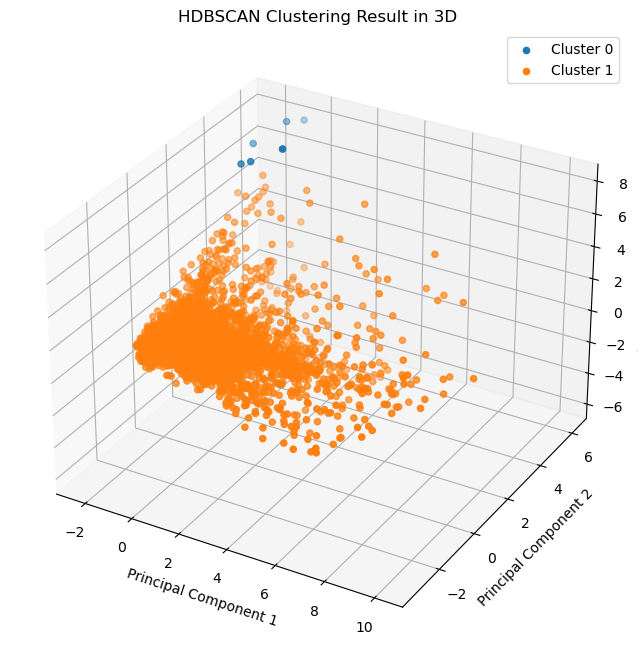

In [171]:
# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot clusters in 3D
for label in np.unique(cluster_labels):
    if label == -1:  # Skip noise points
        continue
    cluster_points = df_pca[cluster_labels == label]
    ax.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], cluster_points.iloc[:, 2], label=f'Cluster {label}')

# Plot noise points separately
#noise_points = df_pca[cluster_labels == -1]
#ax.scatter(noise_points.iloc[:, 0], noise_points.iloc[:, 1], noise_points.iloc[:, 2], c='black', marker='x', label='Noise')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('HDBSCAN Clustering Result in 3D')
ax.legend()
plt.show()

# 2D Plot
plt.figure(figsize=(10, 8))

# Plot clusters in 2D
for label in np.unique(cluster_labels):
    if label == -1:  # Skip noise points
        continue
    cluster_points = df_pca[cluster_labels == label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {label}')

# Plot noise points separately
#plt.scatter(noise_points.iloc[:, 0], noise_points.iloc[:, 1], c='black', marker='x', label='Noise')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('HDBSCAN Clustering Result in 2D')
plt.legend()
plt.show()

In [172]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)

# Calculate Davies-Bouldin Index
davies_bouldin_idx = davies_bouldin_score(df_scaled, cluster_labels)

# Calculate Calinski-Harabasz Index
calinski_harabasz_idx = calinski_harabasz_score(df_scaled, cluster_labels)

print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin_idx)
print("Calinski-Harabasz Index:", calinski_harabasz_idx)

Silhouette Score: 0.7118879334956733
Davies-Bouldin Index: 1.6902609694711164
Calinski-Harabasz Index: 98.94113522722674


# Clustering the data using the final model and assigning clusters to data points

In [173]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)

# Calculate Davies-Bouldin Index
davies_bouldin_idx = davies_bouldin_score(df_scaled, cluster_labels)

# Calculate Calinski-Harabasz Index
calinski_harabasz_idx = calinski_harabasz_score(df_scaled, cluster_labels)

print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin_idx)
print("Calinski-Harabasz Index:", calinski_harabasz_idx)

Silhouette Score: 0.7118879334956733
Davies-Bouldin Index: 1.6902609694711164
Calinski-Harabasz Index: 98.94113522722674


In [174]:
import pandas as pd
hierarchical_cluster = AgglomerativeClustering(n_clusters=3,linkage ='ward') 
cluster_labels = hierarchical_cluster.fit_predict(df_pca)
df_with_clusters = df_pca.copy()

# Add a new column to the DataFrame containing the cluster labels
df_with_clusters['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
data_final = df_with_clusters['Cluster']
df_final = pd.DataFrame(data_final)

In [175]:
df_final.sample(20)

Cluster
CustomerID         
15424.0           0
13403.0           0
14529.0           2
16614.0           0
15865.0           0
13126.0           2
17947.0           0
17682.0           2
17153.0           0
14487.0           2
14448.0           0
14524.0           2
15303.0           0
17714.0           0
18005.0           0
13865.0           0
15981.0           2
12650.0           0
15078.0           1
18231.0           2

In [176]:
merged_df = pd.merge(df_final, customer_data_cleaned, left_index=True, right_index=True, how='inner')

# Project Phase 3

In [177]:
merged_df

Cluster  Days_since_Most_rececnt_purchase  Total_transactions  \
CustomerID                                                                  
12347.0           2                                 1                 182   
12348.0           0                                74                  27   
12349.0           2                                18                  72   
12350.0           0                               309                  16   
12352.0           2                                35                  84   
...             ...                               ...                 ...   
18280.0           0                               277                  10   
18281.0           0                               180                   7   
18282.0           2                                 7                  13   
18283.0           1                                 3                 719   
18287.0           2                                42                  70   

            total_products_purchased  Total_spend  Average_spend  \
CustomerID                                                         
12347.0                         2458      4310.00      23.681319   
12348.0                         2332      1437.24      53.231111   
12349.0                          630      1457.55      20.243750   
12350.0                          196       294.40      18.400000   
12352.0                          526      1385.74      16.496905   
...                              ...          ...            ...   
18280.0                           45       180.60      18.060000   
18281.0                           54        80.82      11.545714   
18282.0                          103       178.05      13.696154   
18283.0                         1355      2039.58       2.836690   
18287.0                         1586      1837.28      26.246857   

            Unique_products_purchased  Average_days_between_transactions  \
CustomerID                                                                 
12347.0                           103                           2.000000   
12348.0                            21                          10.846154   
12349.0                            72                           0.000000   
12350.0                            16                           0.000000   
12352.0                            57                           3.108434   
...                               ...                                ...   
18280.0                            10                           0.000000   
18281.0                             7                           0.000000   
18282.0                            12                           9.833333   
18283.0                           262                           0.455432   
18287.0                            59                           2.275362   

            Total_cancelled_transactions  cancellation_rate  
CustomerID                                                   
12347.0                              0.0           0.000000  
12348.0                              0.0           0.000000  
12349.0                              0.0           0.000000  
12350.0                              0.0           0.000000  
12352.0                              1.0           0.011905  
...                                  ...                ...  
18280.0                              0.0           0.000000  
18281.0                              0.0           0.000000  
18282.0                              1.0           0.076923  
18283.0                              0.0           0.000000  
18287.0                              0.0           0.000000  

[4071 rows x 10 columns]

In [178]:
merged_df.columns

Index(['Cluster', 'Days_since_Most_rececnt_purchase', 'Total_transactions',
       'total_products_purchased', 'Total_spend', 'Average_spend',
       'Unique_products_purchased', 'Average_days_between_transactions',
       'Total_cancelled_transactions', 'cancellation_rate'],
      dtype='object')

In [180]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = merged_df.drop('Cluster', axis=1)  
y = merged_df['Cluster']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)


train_accuracy = rf_classifier.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)


print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Training Accuracy: 1.0
Testing Accuracy: 0.9803680981595092

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       418
           1       0.94      0.94      0.94        66
           2       0.97      0.98      0.98       331

    accuracy                           0.98       815
   macro avg       0.97      0.97      0.97       815
weighted avg       0.98      0.98      0.98       815


Confusion Matrix:
[[413   0   5]
 [  0  62   4]
 [  3   4 324]]


In [184]:
import pickle
pickle_out= open('random_forest_model.pkl', 'wb')
pickle.dump(rf_classifier, pickle_out)
pickle_out.close()    

# Determining The top 5 items for each cluster

In [210]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country Order_status  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   Sucessfull   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   Sucessfull   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   Sucessfull   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   Sucessfull   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   Sucessfull   

   Returned_order_qty  year     month  totalprice purchase_month        day  
0                   0  2010  December       15.30       December  Wednesday  
1                   0  2010  December       20.34       December  Wednesday  
2                   0  2010  December       22.00       December  Wednesday  
3                   0  2010  December       20.34       December  Wednesday  
4                   0  2010  December       20.34       December  Wednesday

In [217]:
merged_df

Cluster  Days_since_Most_rececnt_purchase  Total_transactions  \
CustomerID                                                                  
12347.0           2                                 1                 182   
12348.0           0                                74                  27   
12349.0           2                                18                  72   
12350.0           0                               309                  16   
12352.0           2                                35                  84   
...             ...                               ...                 ...   
18280.0           0                               277                  10   
18281.0           0                               180                   7   
18282.0           2                                 7                  13   
18283.0           1                                 3                 719   
18287.0           2                                42                  70   

            total_products_purchased  Total_spend  Average_spend  \
CustomerID                                                         
12347.0                         2458      4310.00      23.681319   
12348.0                         2332      1437.24      53.231111   
12349.0                          630      1457.55      20.243750   
12350.0                          196       294.40      18.400000   
12352.0                          526      1385.74      16.496905   
...                              ...          ...            ...   
18280.0                           45       180.60      18.060000   
18281.0                           54        80.82      11.545714   
18282.0                          103       178.05      13.696154   
18283.0                         1355      2039.58       2.836690   
18287.0                         1586      1837.28      26.246857   

            Unique_products_purchased  Average_days_between_transactions  \
CustomerID                                                                 
12347.0                           103                           2.000000   
12348.0                            21                          10.846154   
12349.0                            72                           0.000000   
12350.0                            16                           0.000000   
12352.0                            57                           3.108434   
...                               ...                                ...   
18280.0                            10                           0.000000   
18281.0                             7                           0.000000   
18282.0                            12                           9.833333   
18283.0                           262                           0.455432   
18287.0                            59                           2.275362   

            Total_cancelled_transactions  cancellation_rate  
CustomerID                                                   
12347.0                              0.0           0.000000  
12348.0                              0.0           0.000000  
12349.0                              0.0           0.000000  
12350.0                              0.0           0.000000  
12352.0                              1.0           0.011905  
...                                  ...                ...  
18280.0                              0.0           0.000000  
18281.0                              0.0           0.000000  
18282.0                              1.0           0.076923  
18283.0                              0.0           0.000000  
18287.0                              0.0           0.000000  

[4071 rows x 10 columns]

In [218]:
merged_df.reset_index(inplace=True)

In [220]:
merged_df

CustomerID  Cluster  Days_since_Most_rececnt_purchase  \
0        12347.0        2                                 1   
1        12348.0        0                                74   
2        12349.0        2                                18   
3        12350.0        0                               309   
4        12352.0        2                                35   
...          ...      ...                               ...   
4066     18280.0        0                               277   
4067     18281.0        0                               180   
4068     18282.0        2                                 7   
4069     18283.0        1                                 3   
4070     18287.0        2                                42   

      Total_transactions  total_products_purchased  Total_spend  \
0                    182                      2458      4310.00   
1                     27                      2332      1437.24   
2                     72                       630      1457.55   
3                     16                       196       294.40   
4                     84                       526      1385.74   
...                  ...                       ...          ...   
4066                  10                        45       180.60   
4067                   7                        54        80.82   
4068                  13                       103       178.05   
4069                 719                      1355      2039.58   
4070                  70                      1586      1837.28   

      Average_spend  Unique_products_purchased  \
0         23.681319                        103   
1         53.231111                         21   
2         20.243750                         72   
3         18.400000                         16   
4         16.496905                         57   
...             ...                        ...   
4066      18.060000                         10   
4067      11.545714                          7   
4068      13.696154                         12   
4069       2.836690                        262   
4070      26.246857                         59   

      Average_days_between_transactions  Total_cancelled_transactions  \
0                              2.000000                           0.0   
1                             10.846154                           0.0   
2                              0.000000                           0.0   
3                              0.000000                           0.0   
4                              3.108434                           1.0   
...                                 ...                           ...   
4066                           0.000000                           0.0   
4067                           0.000000                           0.0   
4068                           9.833333                           1.0   
4069                           0.455432                           0.0   
4070                           2.275362                           0.0   

      cancellation_rate  
0              0.000000  
1              0.000000  
2              0.000000  
3              0.000000  
4              0.011905  
...                 ...  
4066           0.000000  
4067           0.000000  
4068           0.076923  
4069           0.000000  
4070           0.000000  

[4071 rows x 11 columns]

In [221]:
result_df = pd.merge(df, merged_df, on='CustomerID')


In [226]:
result_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Order_status',
       'Returned_order_qty', 'year', 'month', 'totalprice', 'purchase_month',
       'day', 'Cluster', 'Days_since_Most_rececnt_purchase',
       'Total_transactions', 'total_products_purchased', 'Total_spend',
       'Average_spend', 'Unique_products_purchased',
       'Average_days_between_transactions', 'Total_cancelled_transactions',
       'cancellation_rate'],
      dtype='object')

In [227]:
result_df_grouped = result_df.groupby('Cluster')['Description'].agg(list).reset_index()



In [234]:
result_df_grouped

Cluster                                        Description
0        0  [PAPER CHAIN KIT 50'S CHRISTMAS , BISCUIT TIN ...
1        1  [ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...
2        2  [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...

In [253]:
value = result_df_grouped.iloc[0,1]

In [263]:
from collections import Counter

def top_repeated_strings(string_list):
    # Count occurrences of each string
    string_counts = Counter(string_list)
    # Get top 6 most repeated strings
    top_strings = string_counts.most_common(6)
    return [string[0] for string in top_strings]

In [266]:
for i in range(0,3):
    value = result_df_grouped.iloc[i,1]
    res = top_repeated_strings(value)
    dict.update({i:res})
    
    

In [267]:
dict

{0: ['WHITE HANGING HEART T-LIGHT HOLDER',
  'REGENCY CAKESTAND 3 TIER',
  'ASSORTED COLOUR BIRD ORNAMENT',
  'PARTY BUNTING',
  'REX CASH+CARRY JUMBO SHOPPER',
  'BAKING SET 9 PIECE RETROSPOT '],
 1: ['WHITE HANGING HEART T-LIGHT HOLDER',
  'JUMBO BAG RED RETROSPOT',
  'LUNCH BAG RED RETROSPOT',
  'LUNCH BAG  BLACK SKULL.',
  'REGENCY CAKESTAND 3 TIER',
  'PARTY BUNTING'],
 2: ['WHITE HANGING HEART T-LIGHT HOLDER',
  'REGENCY CAKESTAND 3 TIER',
  'ASSORTED COLOUR BIRD ORNAMENT',
  'JUMBO BAG RED RETROSPOT',
  'SET OF 3 CAKE TINS PANTRY DESIGN ',
  'PARTY BUNTING']}

In [268]:
pickle_out= open('Top_5_items.pkl', 'wb')
pickle.dump(dict, pickle_out)
pickle_out.close()

# The Remaining deployement part of the code is implemented on stream lit, code for this is present in Cust_seg.py and feat_eng.py in src directory